# Table of Contents
 <p><div class="lev1"><a href="#Getting-data"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting data</a></div><div class="lev2"><a href="#Read-the-inertia-tensor-list"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Read the inertia tensor list</a></div><div class="lev2"><a href="#Populate-the-sigma-of-each-halo-found"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Populate the sigma of each halo found</a></div><div class="lev2"><a href="#Compute-eigenvalues"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Compute eigenvalues</a></div><div class="lev2"><a href="#get-their-level-from-the-brick"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>get their level from the brick</a></div><div class="lev2"><a href="#Calcul-des-paramètres-de-l'ellipse"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Calcul des paramètres de l'ellipse</a></div><div class="lev2"><a href="#Chargement-des-informations-de-Ramses"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Chargement des informations de Ramses</a></div><div class="lev2"><a href="#Classification"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Classification</a></div><div class="lev1"><a href="#Tracé-des-valeurs-propres-$\lambda_i$-en-fonction-de-la-masse-et-de-$\sigma/v_\theta$"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tracé des valeurs propres $\lambda_i$ en fonction de la masse et de $\sigma/v_\theta$</a></div><div class="lev2"><a href="#Tracé-avec-$\kappa_{i,j}-=-\frac{\lambda_i}{\lambda_j}$,-les-facteurs-d'asymétrie"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tracé avec $\kappa_{i,j} = \frac{\lambda_i}{\lambda_j}$, les facteurs d'asymétrie</a></div><div class="lev1"><a href="#Vérification-de-$\prod_i\lambda_i-\propto-m$"><span class="toc-item-num">3&nbsp;&nbsp;</span>Vérification de $\prod_i\lambda_i \propto m$</a></div><div class="lev1"><a href="#Corrélation-entre-$\lambda_2-/-m^{1/3}$-et-$\sigma/v_\theta$"><span class="toc-item-num">4&nbsp;&nbsp;</span>Corrélation entre $\lambda_2 / m^{1/3}$ et $\sigma/v_\theta$</a></div><div class="lev1"><a href="#Tracé-de-$\lambda_1/\lambda_0$-en-fonction-de-$m$,-et-$\sigma-/-v_\theta$"><span class="toc-item-num">5&nbsp;&nbsp;</span>Tracé de $\lambda_1/\lambda_0$ en fonction de $m$, et $\sigma / v_\theta$</a></div><div class="lev2"><a href="#Pancakitude"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Pancakitude</a></div><div class="lev2"><a href="#Cigaritude"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Cigaritude</a></div><div class="lev2"><a href="#Using-a-bincount"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Using a bincount</a></div><div class="lev3"><a href="#Distribution-oblate-et-prolate-en-fonction-de-la-masse"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Distribution oblate et prolate en fonction de la masse</a></div><div class="lev3"><a href="#Distribution-oblate-et-prolate-en-fonction-de-la-masse-à-différents-$v_\theta-/-\sigma$"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Distribution oblate et prolate en fonction de la masse à différents $v_\theta / \sigma$</a></div><div class="lev3"><a href="#En-3D"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>En 3D</a></div><div class="lev3"><a href="#Oblate---prolate"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Oblate - prolate</a></div><div class="lev1"><a href="#Plots"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plots</a></div><div class="lev2"><a href="#Étude-du-plot-de-la-masse-en-fonction-des-$\prod_i\lambda_i$"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Étude du plot de la masse en fonction des $\prod_i\lambda_i$</a></div><div class="lev2"><a href="#Tracé-de-quelques-halos"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Tracé de quelques halos</a></div><div class="lev3"><a href="#Fonctions-python"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Fonctions python</a></div><div class="lev3"><a href="#Do-some-plots"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Do some plots</a></div><div class="lev2"><a href="#Vérification-de-l'énumération-des-particules"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Vérification de l'énumération des particules</a></div><div class="lev3"><a href="#Sélection-d'un-halo-au-hasard"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Sélection d'un halo au hasard</a></div><div class="lev2"><a href="#$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$-en-fonction-de-$v_\theta/\sigma$"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$ en fonction de $v_\theta/\sigma$</a></div>

In [50]:
from __future__ import division
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import tools as t
from matplotlib.colors import LogNorm, SymLogNorm, BoundaryNorm, Normalize
import glob
import pymses
from pymses.utils import constants as C
import seaborn as sns

#plt.rcParams['figure.figsize'] = (23, 23*10./16.)
f = 0.7
plt.rcParams['figure.figsize'] = (23*f, 23*10./16*f)
plt.rcParams['figure.dpi'] = 72
#matplotlib.style.use(['ggplot'])
matplotlib.style.use(['bmh'])
#matplotlib.style.use(['fivethirtyeight'])

amrviewer GUI ImportError : are WxPython and PyTables correctly installed?


# Getting data

In [4]:
halo_list = pd.read_csv('lists/list_halo.dat',
                        delim_whitespace=True,
                        skiprows=1,
                        names=['id', 'level', 'mass', 'x', 'y', 'z', 'r']).set_index('id')

In [5]:
unit, ncol, nrow = t.io.read_list_header('lists/list_kingal_00782.dat')
gal_dynamics = pd.DataFrame(t.io.read_list_data_reals(unit, ncol, nrow),
                            columns=['id', 'vtheta', 'dvx', 'dvy', 'dvz', 'mass', 'x', 'y', 'z']).set_index('id')

gd = gal_dynamics
gal_dynamics['sigma_over_vtheta'] = 1./3*np.sqrt((gd.dvx**2 + gd.dvy**2 + gd.dvz**2)) / np.abs(gd.vtheta)
del gd

In [6]:
association = pd.read_csv('lists/associated_halogal_782.dat', delim_whitespace=True, skiprows=1,
                          names=['halo_id', 'level', 'halo_mass', 'gal_id', 'gal_mass']).set_index('halo_id')

In [7]:
halos = t.io.read_brick('/data52/Horizon-AGN/TREE_DM_celldx2kpc_SC0.9r/tree_bricks782', low_mem=['nparts', 'members', 'idh', 'hlevel'])
l = list(tqdm(halos.it))
halos_props = pd.DataFrame([{'hlevel': h['hlevel'], 'idh':h['idh'][0], 'nparts': h['nparts'][0]} for h in l]).set_index('idh')
halo_members = [{'idh': h['idh'][0], 'members': h['members']} for h in l]
del l

## Read the inertia tensor list

In [8]:
inertia_data = pd.read_csv('data/halo_kin.00002.1e10_m.dat', delim_whitespace=True, dtype=np.float,
                           engine='c', index_col=0)

print('Found {} halo.'.format(inertia_data['mass'].size))

Found 280219 halo.


In [9]:
inertia_data.describe()

,mass,x,y,z,xx,xy,xz,yy,yz,zz
count,2.802190e+05,280219.000000,280219.000000,280219.000000,2.802190e+05,2.802190e+05,2.802190e+05,2.802190e+05,2.802190e+05,2.802190e+05
mean,1.470922e+11,0.488322,0.485594,0.477258,1.480526e-04,-7.287321e-07,-9.066143e-07,1.462670e-04,4.076042e-06,1.579338e-04
std,2.536856e+12,0.290229,0.289536,0.290496,6.196318e-04,1.374726e-04,1.313730e-04,5.876581e-04,1.409059e-04,7.033871e-04
min,1.002401e+10,-0.087735,-0.118080,-0.096059,1.339677e-07,-6.091087e-03,-5.888487e-03,1.956345e-07,-4.635994e-03,4.196735e-07
25%,1.445129e+10,0.237481,0.234183,0.224906,6.584609e-06,-1.945236e-06,-1.909511e-06,6.586024e-06,-1.891705e-06,6.599434e-06
50%,2.389057e+10,0.491535,0.486382,0.471971,1.513841e-05,1.453128e-08,5.330499e-09,1.521002e-05,-8.508807e-10,1.500078e-05
75%,5.438028e+10,0.739345,0.736974,0.728734,5.578623e-05,1.970524e-06,1.955629e-06,5.623646e-05,1.967896e-06,5.467366e-05
max,7.423400e+14,0.998422,0.998292,0.998691,2.523796e-02,4.414474e-03,5.719650e-03,2.437855e-02,6.539332e-03,2.898283e-02


## Populate the sigma of each halo found

In [40]:
def get_sov():
    halo_with_galaxy = set(association.index)
    inertia_data_halos = set(inertia_data.index)
    common = halo_with_galaxy.intersection(inertia_data_halos)
    gal_ids = association.loc[common, 'gal_id'].as_matrix()
    sov = gal_dynamics.loc[gal_ids, 'sigma_over_vtheta'].as_matrix()
    return common, sov
ids, sov = get_sov()

inertia_data['host_gal'] = False
inertia_data.loc[ids, 'sigma_over_vtheta'] = sov
inertia_data.loc[ids, 'host_gal'] = True

## Compute eigenvalues

In [11]:
%%cython
cimport numpy as np
import numpy as np
cimport cython

@cython.boundscheck(False)
cdef np.ndarray[double, ndim=2] cy_compute_tensor(np.ndarray[double, ndim=1] xx, np.ndarray[double, ndim=1] xy, 
                   np.ndarray[double, ndim=1] xz, np.ndarray[double, ndim=1] yy,
                   np.ndarray[double, ndim=1] yz, np.ndarray[double, ndim=1] zz, tqdm):
    cdef int i, j
    cdef np.ndarray[double, ndim=2] I
    cdef np.ndarray[double, ndim=2] eva = np.zeros((len(xx), 3))
    cdef np.ndarray[double, ndim=1] tmp

    for i in tqdm(range(len(xx))):
        I = np.zeros((3, 3))
        I[0,0] = xx[i]
        I[0,1] = xy[i]
        I[1,0] = xy[i]
        I[0,2] = xz[i]
        I[2,0] = xz[i]
        I[1,1] = yy[i]
        I[1,2] = yz[i]
        I[2,1] = yz[i]
        I[2,2] = zz[i]

        tmp = np.linalg.eigvalsh(I)
        for j in range(3):
            eva[i, j] = tmp[j]
    return eva

def compute_tensor(d, tqdm=None):
    cdef np.ndarray[double, ndim=1] xx, xy, xz, yy, yz, zz 
    xx, xy, xz, yy, yz, zz = np.array([d['xx'], d['xy'], d['xz'], d['yy'], d['yz'], d['zz']], dtype=np.float)
    if tqdm == None:
        tqdm = lambda i: i
    return cy_compute_tensor(xx, xy, xz, yy, yz, zz, tqdm)                

In [12]:
eva = compute_tensor(inertia_data, tqdm=tqdm)

In [13]:
inertia_data['l0'] = np.sqrt(eva[:, 0])
inertia_data['l1'] = np.sqrt(eva[:, 1])
inertia_data['l2'] = np.sqrt(eva[:, 2])

In [14]:
inertia_data[['log(mass)', 'log(l0)', 'log(l1)', 'log(l2)', 'log(sigma_over_vtheta)']] = (
    np.log10(inertia_data[['mass', 'l0', 'l1', 'l2', 'sigma_over_vtheta']])
    )


## get their level from the brick

In [15]:
to_set = set(inertia_data.index)
from_set = set(halos_props.index)

inter = list(to_set.intersection(from_set))
inertia_data.loc[inter, 'hlevel'] = halos_props.loc[inter, 'hlevel']

In [16]:
inertia_data.head()

,mass,x,y,z,xx,xy,xz,yy,yz,zz,sigma_over_vtheta,l0,l1,l2,log(mass),log(l0),log(l1),log(l2),log(sigma_over_vtheta),hlevel
id,,,,,,,,,,,,,,,,,,,,
1.0,2.447530e+10,0.054218,0.036724,0.032693,0.000006,9.182875e-07,1.416061e-06,0.000009,1.537712e-06,0.000007,NaN,0.002234,0.002567,0.003197,10.388728,-2.650979,-2.590637,-2.495290,NaN,1.0
2.0,7.453690e+11,0.037340,0.004005,0.011199,0.000050,-1.573558e-06,5.984283e-06,0.000061,8.054604e-07,0.000055,0.509452,0.006782,0.007670,0.007816,11.872371,-2.168622,-2.115186,-2.107022,-0.292897,1.0
3.0,1.762556e+10,0.049809,0.010437,0.000391,0.000004,-3.722408e-07,1.590209e-06,0.000008,9.675968e-07,0.000008,NaN,0.001762,0.002746,0.003018,10.246143,-2.754100,-2.561355,-2.520317,NaN,1.0
4.0,1.445129e+10,0.016944,0.043184,0.005668,0.000004,-1.076017e-06,3.801652e-07,0.000004,-5.158914e-07,0.000006,NaN,0.001708,0.002193,0.002553,10.159907,-2.767579,-2.658870,-2.593018,NaN,1.0
5.0,8.762659e+10,0.001566,0.046257,0.035597,0.000037,-4.088153e-06,-7.649228e-06,0.000009,2.248367e-06,0.000019,NaN,0.002850,0.004033,0.006376,10.942636,-2.545108,-2.394334,-2.195485,NaN,1.0


## Calcul des paramètres de l'ellipse

In [17]:
inertia_data['prolateness'] = inertia_data.eval('l2/sqrt(l1*l0)')
inertia_data['log(prolateness)'] = np.log10(inertia_data['prolateness'])

inertia_data['oblateness'] = inertia_data.eval('sqrt(l2*l1)/l0')
inertia_data['log(oblateness)'] = np.log10(inertia_data['oblateness'])

inertia_data['prod_li'] = inertia_data.eval('l2*l1*l0')
inertia_data['log(prod_li)'] = np.log10(inertia_data['prod_li'])

## Chargement des informations de Ramses

In [18]:
RamsesOutput = pymses.RamsesOutput('/data52/Horizon-AGN/OUTPUT_DIR/', 2)

Computing hilbert minimal domain description for output 2 ...
Done !


## Classification

In [19]:
bins = [0, 0.5, 1.5, np.infty]
labels = ['elliptical', 'intermediate', 'spiral']
inertia_data['vtheta_over_sigma'] = 1./inertia_data['sigma_over_vtheta']
inertia_data['galaxy_type'] = pd.cut(inertia_data['vtheta_over_sigma'], bins, labels=labels)

# Tracé des valeurs propres $\lambda_i$ en fonction de la masse et de $\sigma/v_\theta$

On ne prend qu'un point sur 100 pour des questions de temps pour générer le plot dans toute cette section.

In [ ]:
foo = scatter_matrix(inertia_data[['log(mass)', 'log(l0)', 'log(l1)', 'log(l2)', 'log(sigma_over_vtheta)']][::100],
                     diagonal='kde', alpha=0.5)

## Tracé avec $\kappa_{i,j} = \frac{\lambda_i}{\lambda_j}$, les facteurs d'asymétrie

In [ ]:
inertia_data['kappa21'] = inertia_data['l2'] / inertia_data['l1']
inertia_data['kappa20'] = inertia_data['l2'] / inertia_data['l0']
inertia_data['kappa10'] = inertia_data['l1'] / inertia_data['l0']
inertia_data[['log(kappa21)', 'log(kappa20)', 'log(kappa10)']] = (
    np.log10(inertia_data[['kappa21', 'kappa20', 'kappa10']])
    )

In [ ]:
foo = scatter_matrix(inertia_data[['log(mass)', 'log(kappa21)', 'log(kappa20)', 'log(kappa10)', 'log(sigma_over_vtheta)']][::100],
                     diagonal='kde', alpha=0.5)

# Vérification de $\prod_i\lambda_i \propto m$

In [ ]:
plt.scatter(np.log10(inertia_data.eval('l0*l1*l2')), inertia_data['log(mass)'], marker='.',
            cmap='viridis')

plt.xlabel('$\prod_i\lambda_i$ [arbitraire]')
plt.ylabel('$\log(m)$ [$M_\odot$]')

On constate que $\prod_i \lambda_i$ est corrélé pour des grandes masses $\left(m \geq 10^{12}M_\odot\right)$ et pas pour des faibles masses.

# Corrélation entre $\lambda_2 / m^{1/3}$ et $\sigma/v_\theta$

In [ ]:
plt.scatter(inertia_data.eval('log(l2)-1./3*log(mass)'), inertia_data['log(sigma_over_vtheta)'],
           c=inertia_data['log(mass)'], cmap='viridis')
plt.xlabel(r'$ \log\left( \frac{\lambda_2}{m^{1/3}} \right) $')
plt.ylabel(r'$ \log\left( \frac{\sigma}{v_\theta}   \right) $')
cb = plt.colorbar()
cb.set_label('$\log\ m$ [$M_\odot$]')

In [ ]:
plt.scatter(inertia_data.eval('log(l1)+log(l2)+log(l0)-log(mass)'), inertia_data['log(sigma_over_vtheta)'],
           c=inertia_data['log(mass)'], cmap='viridis')
plt.xlabel(r'$ \log\left( \frac{\lambda_2\lambda_1\lambda_0}{m} \right) $')
plt.ylabel(r'$ \log\left( \frac{\sigma}{v_\theta}   \right) $')
cb = plt.colorbar()
cb.set_label('$\log\ m$ [$M_\odot$]')

In [ ]:
plt.scatter(inertia_data.eval('log(l0)-1./3*log(mass)'), inertia_data['log(sigma_over_vtheta)'],
           c=inertia_data['log(mass)'], cmap='viridis')
plt.xlabel(r'$ \log\left( \frac{\lambda_1}{m^{2/3}} \right) $')
plt.ylabel(r'$ \log\left( \frac{\sigma}{v_\theta}   \right) $')
cb = plt.colorbar()
cb.set_label('$\log\ m$ [$M_\odot$]')

In [ ]:
tmp = inertia_data
tmp['log(prod_li)'] = tmp.eval('log(l0*l1*l2)')
tmp[['log(prod_li)', 'log(sigma_over_vtheta)', 'log(mass)']].corr()

# Tracé de $\lambda_1/\lambda_0$ en fonction de $m$, et $\sigma / v_\theta$

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

vmin, vmax = inertia_data['sigma_over_vtheta'].min(), inertia_data['sigma_over_vtheta'].max()

for i,j in itertools.product(range(2), repeat=2):
    massmin = 10 + i + 2*j
    ax = axes[1-j,1-i]
    tmp = inertia_data[inertia_data['log(mass)'] >= massmin][inertia_data['log(mass)'] < massmin + 1]
    sc = ax.scatter(tmp['log(kappa21)'], tmp['log(mass)'], c=tmp['sigma_over_vtheta'],
                    cmap='viridis', vmin=vmin, vmax=vmax)
    ax.set_title(r'${} \leq \log\ m < {}$'.format(massmin, massmin+1))
axes[1,0].set_xlabel('$\log \lambda_2 - \log \lambda_1$')
axes[1,1].set_xlabel('$\log \lambda_2 - \log \lambda_1$')

axes[1,0].set_ylabel('$\log\ m$ [$M_\odot$]')
axes[0,0].set_ylabel('$\log\ m$ [$M_\odot$]')

fig.subplots_adjust(right=0.90, wspace=0, hspace=0)
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
cb = plt.colorbar(sc, cax=cbar_ax)
cb.set_label(r'$\sigma/v_\theta$')
del tmp

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)

vmin, vmax = inertia_data['sigma_over_vtheta'].min(), inertia_data['sigma_over_vtheta'].max()

ax = ax
tmp = inertia_data
sc = ax.scatter(tmp['log(kappa21)'], tmp['log(mass)'], c=tmp['sigma_over_vtheta'],
                cmap='viridis', vmin=vmin, vmax=vmax)

ax.set_xlabel('$\log \lambda_2 - \log \lambda_1$')
ax.set_ylabel('$\log\ m$ [$M_\odot$]')

fig.subplots_adjust(right=0.90, wspace=0, hspace=0)
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
cb = plt.colorbar(sc, cax=cbar_ax)
cb.set_label(r'$\sigma/v_\theta$')
del tmp

## Pancakitude
On trace $\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$ en fonction de la masse, coloré par $\sigma/v_\theta$.

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

vmin, vmax = inertia_data['sigma_over_vtheta'].min(), inertia_data['sigma_over_vtheta'].max()
vmax = 10

ax = axes[0]
tmp = inertia_data[inertia_data['log(mass)'] > 12][inertia_data['sigma_over_vtheta'] > 1]
sc = ax.hist2d(np.log10(tmp.eval('sqrt(l2*l1)/l0')), tmp['log(mass)'], bins=32, normed=True) #c=tmp['sigma_over_vtheta'],
#                cmap='viridis', vmin=vmin, vmax=vmax)
ax.set_title(r'$\sigma/v_\theta  > 1$')

ax.set_xlabel('$\log \sqrt{\lambda_2\lambda_1} - \log \lambda_0$')
ax.set_ylabel('$\log\ m$ [$M_\odot$]')

ax = axes[1]
tmp = inertia_data[inertia_data['log(mass)'] > 12][inertia_data['sigma_over_vtheta'] <= 1]
sc = ax.hist2d(np.log10(tmp.eval('sqrt(l2*l1)/l0')), tmp['log(mass)'], bins=32, normed=True) #c=tmp['sigma_over_vtheta'],
#                cmap='viridis', vmin=vmin, vmax=vmax)
ax.set_title(r'$\sigma/v_\theta \leq 1$')

ax.set_xlabel('$\log \sqrt{\lambda_2\lambda_1} - \log \lambda_0$')
ax.set_ylabel('$\log\ m$ [$M_\odot$]')

#fig.subplots_adjust(right=0.90, wspace=0, hspace=0)
#cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
#cb = plt.colorbar(sc, cax=cbar_ax)
#cb.set_label(r'$\sigma/v_\theta$')
del tmp

## Cigaritude
On trace $\frac{\lambda_2}{\sqrt{\lambda_0\lambda_1}}$ en fonction de la masse, coloré par $\sigma/v_\theta$.

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True)

vmin, vmax = inertia_data['sigma_over_vtheta'].min(), inertia_data['sigma_over_vtheta'].max()
vmax = 10

ax = axes[0]
tmp = inertia_data[inertia_data['log(mass)'] > 12][inertia_data['sigma_over_vtheta'] > 1]
sc = ax.hist2d(np.log10(tmp.eval('l2/sqrt(l0*l1)')), tmp['log(mass)'], bins=32, normed=True) #c=tmp['sigma_over_vtheta'],
#                cmap='viridis', vmin=vmin, vmax=vmax)
ax.set_title(r'$\sigma/v_\theta  > 1$')

ax.set_xlabel('$\log \lambda_2 - \log \sqrt{\lambda_0\lambda_1} $')
ax.set_ylabel('$\log\ m$ [$M_\odot$]')

ax = axes[1]
tmp = inertia_data[inertia_data['log(mass)'] > 12][inertia_data['sigma_over_vtheta'] <= 1]
sc = ax.hist2d(np.log10(tmp.eval('l2/sqrt(l0*l1)')), tmp['log(mass)'], bins=32, normed=True) #c=tmp['sigma_over_vtheta'],
#                cmap='viridis', vmin=vmin, vmax=vmax)
ax.set_title(r'$\sigma/v_\theta  \leq 1$')

ax.set_xlabel('$\log \lambda_2 - \log \sqrt{\lambda_0\lambda_1} $')
ax.set_ylabel('$\log\ m$ [$M_\odot$]')

#fig.subplots_adjust(right=0.90, wspace=0, hspace=0)
#cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
#cb = plt.colorbar(sc, cax=cbar_ax)
#cb.set_label(r'$\sigma/v_\theta$')
del tmp

In [ ]:
from matplotlib.colors import LogNorm
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

minmass = 11.5
maxmass = 12.5
vmin, vmax = inertia_data['sigma_over_vtheta'].min(), inertia_data['sigma_over_vtheta'].max()
vmax = 10

for i, j in itertools.product(range(2), repeat=2):
    
    ax = axes[i, j]
    if i == 0:
        tmp = inertia_data[inertia_data['log(mass)'] >= minmass][inertia_data['log(mass)'] < maxmass][inertia_data['sigma_over_vtheta'] > 1]
        ylabel = r'$\log\ m$ [$M_\odot$]'
        ylabel2 = r'$\sigma/v_\theta  > 1$'
    elif i == 1:
        tmp = inertia_data[inertia_data['log(mass)'] >= minmass][inertia_data['log(mass)'] < maxmass][inertia_data['sigma_over_vtheta'] <= 1]
        ylabel = r'$\log\ m$ [$M_\odot$]'
        ylabel2 = r'$\sigma/v_\theta  \leq 1$'
        
    if j == 0:
        xdata  = np.log10(tmp.eval('l2/sqrt(l0*l1)'))
        xlabel = '$\log \lambda_2 - \log \sqrt{\lambda_0\lambda_1} $ (prolate)'
    elif j == 1:
        xdata  = np.log10(tmp.eval('sqrt(l2*l1)/l0'))
        xlabel = '$\log \sqrt{\lambda_2\lambda_1} - \log\lambda_0 $ (oblate)'  
        
    #_,_,_,img = ax.hist2d(xdata, tmp['log(mass)'], normed=True, bins=32, cmap='viridis') #c=tmp['sigma_over_vtheta'],
    #                cmap='viridis', vmin=vmin, vmax=vmax)
    img = ax.scatter(xdata, tmp['log(mass)'], c=tmp['sigma_over_vtheta'], norm=LogNorm(vmin=vmin, vmax=vmax), cmap='viridis')

    if i == 1:
        ax.set_xlabel(xlabel)
    if j == 0:
        ax.set_ylabel(ylabel)
    elif j == 1:
        ax2 = ax.twinx()
        ax2.set_ylabel(ylabel2)
        ax2.set_yticks([])
        
plt.subplots_adjust(right=0.90, wspace=0.01, hspace=0.01)
cbar_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
cb = plt.colorbar(img, cax=cbar_ax)

## Using a bincount

### Distribution oblate et prolate en fonction de la masse

In [ ]:
def py_get_grids(x, y, nbin):
    ''' Return the mean of z in each bin of x,y '''
    ymi, yma = np.min(y), np.max(y)
    xmi, xma = np.min(x), np.max(x)
    
    return np.mgrid[xmi:xma:1j*nbin, ymi:yma:1j*nbin]

def py_compute_bin(x, y, z, nbin=10, tqdm=lambda e: e):
    '''Parameter:
    ----------
    x,y,z: (N) array, the data
    nbin: integer, the number of bin to project on
    tqdm: function, function to pass to show progress
    
    Return: z_mean, z_std, z_count
    -------
    z_mean: (nbin, nbin) float array, the mean of z on each x,y bin
    z_std: (nbin, nbin) float array, the standard deviation of z on each x,y bin
    z_count: (nbin, nbin) integer array, the number of z in each x,y bin
    '''
    z_mean, z_count, z_std = [np.zeros((nbin, nbin)) for _ in range(3)]
    
    x_grid, y_grid = py_get_grids(x, y, nbin=nbin)
    
    for i in tqdm(range(nbin-1)):
        tmp = z[x >= x_grid[i,0]][x < x_grid[i+1,0]]
        for j in range(nbin-1):
            # select our data
            c = tmp[y >= y_grid[i,j]][y < y_grid[i+1,j+1]]
            # compute the stat. data
            z_mean[i, j], z_std[i, j], z_count[i, j] = c.describe()[['mean', 'std', 'count']]

    return z_mean, z_std, z_count

In [ ]:
plt.figure()

nbins=128
_tmp = inertia_data
mask = _tmp['host_gal'] == True

oblateness = _tmp['oblateness'][mask]

bin_sum, _, _   = np.histogram2d(oblateness, _tmp['log(mass)'][mask], weights=1./_tmp['sigma_over_vtheta'][mask], bins=128)
bin_count, xedge, yedge = np.histogram2d(oblateness, _tmp['log(mass)'][mask], bins=128)

extent = (xedge[0], xedge[-1], yedge[0], yedge[-1])

CS = plt.contour(xedge[:-1], yedge[:-1], bin_count.T, norm=LogNorm(), extent=extent, origin='lower', cmap='Greys')
plt.clabel(CS, inline=1, fontsize=14)

img = plt.imshow((bin_sum / bin_count).T, origin='lower', extent=extent, aspect='auto', cmap='viridis', interpolation='None')#, vmax=10)

cb = plt.colorbar(img)
cb.set_label(r'$\left\langle v_\theta / \sigma \right\rangle$')

#plt.xlim(extent[:2])
#plt.ylim(extent[2:])

plt.xlabel(r'$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$, oblateness')
plt.ylabel('$\log m$ [$M_\odot$]')

plt.savefig('/home/cadiou/plots/oblate__m__vtheta_o_sigma.png')
del _tmp

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
axes = axes.flatten()

nbins = 128
zones = [
    (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) > -5][inertia_data['log(mass)'] < 12],
        r"$\pi_i \lambda_i > 10^{-5}$", "red"
    ), (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) <= -5][np.log10(inertia_data.eval('l0*l1*l2')) > -6][inertia_data['log(mass)'] < 12],
        r"$10^{-6} > \pi_i \lambda_i \geq 10^{-5}$", "green"
    ), (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) <= -6][inertia_data['log(mass)'] < 12],
         r"$10^{-6} > \pi_i \lambda_i$", "blue"
    ), (inertia_data[inertia_data['log(mass)'] < 12],
        "Any", "grey"
    )
]
_range = [[1, 9], [10, 12]]
for i, (zone, label, color) in zip(itertools.count(), zones):
    ax = axes[i]
    ax.set_title(label)

    _tmp = zone

    mask = np.logical_not(np.isnan(_tmp['sigma_over_vtheta']))
    bin_sum, _, _   = np.histogram2d(_tmp['oblateness'][mask], _tmp['log(mass)'][mask],
                                     weights=1./_tmp['sigma_over_vtheta'][mask], bins=nbins, range=_range)

    bin_count, xedge, yedge = np.histogram2d(_tmp['oblateness'][mask], _tmp['log(mass)'][mask],
                                             bins=nbins, range=_range)

    extent = (xedge[0], xedge[-1], yedge[0], yedge[-1])

    CS = ax.contour(xedge[:-1], yedge[:-1], bin_count.T, norm=LogNorm(), extent=extent, origin='lower', cmap='Greys')
    ax.clabel(CS, inline=1, fontsize=14)

    img = ax.imshow((bin_sum / bin_count).T, origin='lower', extent=extent, aspect='auto', cmap='viridis', interpolation='None')


    #     counts, xedge, yedge, img = ax.hist2d(zone['oblateness'][mask], zone['log(mass)'][mask],
    #                                           weights=1/zone['sigma_over_vtheta'][mask], bins=nbins, cmin=1e-2, cmap='viridis',
    #                                           range=_range, norm=LogNorm(), vmax=50)
    #     extent = (xedge[0], xedge[-1], yedge[0], yedge[-1])

    #     CS = ax.contour(xedge[:-1], yedge[:-1], counts.T, norm=LogNorm(), origin='lower', cmap='Greys', alpha=0.5)
    #     ax.clabel(CS, inline=1, fontsize=14)
    #     cb = ax.colorbar()
    #     cb.set_label(r'$\left\langle v_\theta / \sigma \right\rangle$')


xlabel = r'$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$, oblateness'
ylabel = '$\log m$ [$M_\odot$]'
axes[3].set_xlabel(xlabel)
axes[2].set_xlabel(xlabel)
axes[0].set_ylabel(ylabel)
axes[2].set_ylabel(ylabel)

#axes[3].set_xlim(_range[0])
#axes[3].set_ylim(_range[1])

plt.subplots_adjust(right=0.90, wspace=0.01, hspace=0.05)
cbar_ax = fig.add_axes([0.93, 0.15, 0.03, 0.7])
cb = plt.colorbar(img, cax=cbar_ax)
cb.set_label(r'$\left\langle v_\theta / \sigma \right\rangle$')
plt.savefig('/home/cadiou/plots/oblate__m__vtheta_o_sigma__zones.png')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
axes = axes.flatten()

nbins = 128
zones = [
    (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) > -5][inertia_data['log(mass)'] < 12],
        r"$\pi_i \lambda_i > 10^{-5}$", "red"
    ), (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) <= -5][np.log10(inertia_data.eval('l0*l1*l2')) > -6][inertia_data['log(mass)'] < 12],
        r"$10^{-6} > \pi_i \lambda_i \geq 10^{-5}$", "green"
    ), (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) <= -6][inertia_data['log(mass)'] < 12],
         r"$10^{-6} > \pi_i \lambda_i$", "blue"
    ), (inertia_data[inertia_data['log(mass)'] < 12],
        "Any", "grey"
    )
]
_range = [[1, 9], [10, 12]]
for i, (zone, label, color) in zip(itertools.count(), zones):
    ax = axes[i]
    ax.set_title(label)
    
    _tmp = zone
    
    mask = _tmp['host_gal'] == True
    bin_sum, _, _   = np.histogram2d(_tmp['prolateness'][mask], _tmp['log(mass)'][mask], weights=1./_tmp['sigma_over_vtheta'][mask], bins=nbins, range=_range)
    bin_count, xedge, yedge = np.histogram2d(_tmp['prolateness'][mask], _tmp['log(mass)'][mask], bins=nbins, range=_range)

    extent = (xedge[0], xedge[-1], yedge[0], yedge[-1])

    #CS = ax.contour(xedge[:-1], yedge[:-1], bin_count.T, norm=LogNorm(), extent=extent, origin='lower', cmap='Greys')
    #ax.clabel(CS, inline=1, fontsize=14)

    img = ax.imshow((bin_sum / bin_count).T, origin='lower', extent=extent, aspect='auto', cmap='viridis', interpolation='None')
    
    
    #     counts, xedge, yedge, img = ax.hist2d(zone['oblateness'][mask], zone['log(mass)'][mask],
    #                                           weights=1/zone['sigma_over_vtheta'][mask], bins=nbins, cmin=1e-2, cmap='viridis',
    #                                           range=_range, norm=LogNorm(), vmax=50)
    #     extent = (xedge[0], xedge[-1], yedge[0], yedge[-1])

    CS = ax.contour(xedge[:-1], yedge[:-1], bin_count.T, norm=LogNorm(), origin='lower', cmap='Greys', alpha=0.5)
    ax.clabel(CS, inline=1, fontsize=14)
    #     cb = ax.colorbar()
    #     cb.set_label(r'$\left\langle v_\theta / \sigma \right\rangle$')


xlabel = r'$\frac{\lambda_2}{\sqrt{\lambda_1\lambda_0}}$, prolateness'
ylabel = '$\log m$ [$M_\odot$]'
axes[3].set_xlabel(xlabel)
axes[2].set_xlabel(xlabel)
axes[0].set_ylabel(ylabel)
axes[2].set_ylabel(ylabel)

#axes[3].set_xlim(_range[0])
#axes[3].set_ylim(_range[1])

plt.subplots_adjust(right=0.85, wspace=0.01, hspace=0.05)
cbar_ax = fig.add_axes([0.90, 0.15, 0.03, 0.7])
cb = plt.colorbar(img, cax=cbar_ax)
cb.set_label(r'$\left\langle v_\theta / \sigma \right\rangle$')

plt.savefig('/home/cadiou/plots/prolate__m__vtheta_o_sigma__zones.png')

In [ ]:
nbins = 128
fig, (ax0, ax1) = plt.subplots(ncols=2)

# Keep only halo with defined sigma/vtheta
mask = inertia_data['host_gal']

# Prolate
_range = [[1, 9], [10, 15]]
bin_sum, _, _   = np.histogram2d(inertia_data['prolateness'][mask], inertia_data['log(mass)'][mask], weights=1./inertia_data['sigma_over_vtheta'][mask], bins=nbins, range=_range)
bin_count0, xedge0, yedge0 = np.histogram2d(inertia_data['prolateness'][mask], inertia_data['log(mass)'][mask], bins=nbins, range=_range)

extent = (xedge0[0], xedge0[-1], yedge0[0], yedge0[-1])
CS = ax0.contour((bin_count0).T, extent=extent, origin='lower', cmap='Greys', norm=LogNorm())
ax0.clabel(CS, inline=1, fontsize=14)

ax0.imshow((bin_sum / bin_count0).T, origin='lower', extent=extent, aspect='auto', cmap='viridis', interpolation='None', vmax=2)
ax0.set_xlabel(r'$\frac{\lambda_2}{\sqrt{\lambda_1\lambda_0}}$, prolateness')
ax0.set_ylabel('$\log m$ [$M_\odot$]')
ax0.set_xlim(1, 10)
# Oblate
bin_sum, _, _   = np.histogram2d(inertia_data['oblateness'][mask], inertia_data['log(mass)'][mask], weights=1./inertia_data['sigma_over_vtheta'][mask], bins=nbins)
bin_count1, xedge1, yedge1 = np.histogram2d(inertia_data['oblateness'][mask], inertia_data['log(mass)'][mask], bins=nbins)

extent = (xedge1[0], xedge1[-1], yedge1[0], yedge1[-1])
CS = ax1.contour((bin_count1).T, extent=extent, origin='lower', cmap='Greys', norm=LogNorm())
ax1.clabel(CS, inline=1, fontsize=14)

img = ax1.imshow((bin_sum / bin_count1).T, origin='lower', extent=extent, aspect='auto', cmap='viridis', interpolation='None', vmax=2)
ax1.set_xlabel(r'$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$, oblateness')
#ax1.set_yticks()

# add colorbar
plt.subplots_adjust(right=0.85, wspace=0.01, hspace=0.01)
cbar_ax = fig.add_axes([0.90, 0.15, 0.03, 0.7])
cb = plt.colorbar(img, cax=cbar_ax)
cb.set_label(r'$\left\langle v_\theta/\sigma \right\rangle$')

plt.savefig('/home/cadiou/plots/prolate_and_oblate__m__vtheta_o_sigma.png')

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes = axes.flatten()
for i in range(4):
    dt = inertia_data[inertia_data.hlevel >= i+1][inertia_data.hlevel < i+2]
    axes[i].scatter(dt['log(prolateness)'], dt['log(mass)'])
    axes[i].set_title('$%s \leq \mathrm{hlevel} < %s$' % (i+1, i+2))
    axes[i].set_xlabel(u'Prolacité (log)')
    axes[i].set_ylabel(u'Masse (log)')

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
axes = axes.flatten()
for i in range(4):
    dt = inertia_data[inertia_data.hlevel >= i+1][inertia_data.hlevel < i+2]
    axes[i].scatter(dt['log(oblateness)'], dt['log(mass)'])
    axes[i].set_title('$%s \leq \mathrm{hlevel} < %s$' % (i+1, i+2))
    axes[i].set_xlabel(u'Oblacité (log)')
    axes[i].set_ylabel(u'Masse (log)')

### Distribution oblate et prolate en fonction de la masse à différents $v_\theta / \sigma$

In [ ]:
nbins = 128
plt.figure()

ax0l = plt.subplot2grid((1, 8), (0, 0))
ax0  = plt.subplot2grid((1, 8), (0, 1), colspan=3, sharey=ax0l)
ax1l = plt.subplot2grid((1, 8), (0, 4), sharey=ax0l, sharex=ax0l)
ax1  = plt.subplot2grid((1, 8), (0, 5), colspan=3, sharey=ax0l, sharex=ax0)

n = LogNorm()

extent = [[1,6], [10, 15]]
# Keep only halo with defined sigma/vtheta
mask = inertia_data['host_gal'] == True

# v/sigma < 1
tmp = inertia_data[1./inertia_data['sigma_over_vtheta'] < 1]
counts,xe,ye,img = ax0.hist2d(tmp['oblateness'], tmp['log(mass)'], bins=nbins, cmin=1, norm=n, cmap='viridis', range=extent)
ax0.set_title(r'$v_\theta / \sigma < 1$')

tmp = np.where(np.isnan(counts), 0, counts)
ax0l.plot(np.sum(tmp, axis=0), ye[:-1])
ax0l.set_xscale('log')

# v/sigma > 1
tmp = inertia_data[1./inertia_data['sigma_over_vtheta'] > 1]
counts,xe,ye,img = ax1.hist2d(tmp['oblateness'], tmp['log(mass)'], bins=nbins, cmin=1, norm=n, cmap='viridis', range=extent)
ax1.set_title(r'$v_\theta / \sigma > 1$')

tmp = np.where(np.isnan(counts), 0, counts)
ax1l.plot(np.sum(tmp, axis=0), ye[:-1])
ax1l.set_xscale('log')

# Labels
ax1.set_xlabel(r'$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$, oblateness')
ax0.set_xlabel(r'$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$, oblateness')

ax0l.set_ylabel('$\log\ m$ [$M_\odot$]')
ax0l.set_xlabel('Counts')
ax1l.set_xlabel('Counts')

cb = plt.colorbar(img) 
cb.set_label('Count')

plt.subplots_adjust(hspace=0.01, wspace=0.01)

plt.savefig('/home/cadiou/plots/oblateness__mass__2diff_vtheta_o_vsigma.png')

In [ ]:
plt.figure()

nbins = 128
ax0l = plt.subplot2grid((1, 8), (0, 0))
ax0  = plt.subplot2grid((1, 8), (0, 1), colspan=3, sharey=ax0l)
ax1l = plt.subplot2grid((1, 8), (0, 4), sharey=ax0l, sharex=ax0l)
ax1  = plt.subplot2grid((1, 8), (0, 5), colspan=3, sharey=ax0l, sharex=ax0)

n = LogNorm()

extent = [[1,6], [10, 15]]
# Keep only halo with defined sigma/vtheta
mask = inertia_data['host_gal'] == True

# v/sigma < 1
bound = 0.5
tmp = inertia_data[1./inertia_data['sigma_over_vtheta'] < bound]
counts, xe, ye, img = ax0.hist2d(tmp['oblateness'], tmp['log(mass)'], bins=nbins, cmin=1, norm=n, cmap='viridis', range=extent)
ax0.set_title(r'$v_\theta / \sigma < %s$' % bound)

tmp = np.where(np.isnan(counts), 0, counts)
ax0l.plot(np.sum(tmp, axis=0), ye[:-1])
ax0l.set_xscale('log')

# v/sigma > 1
bound = 1.5
tmp = inertia_data[1./inertia_data['sigma_over_vtheta'] > bound]
counts, xe, ye, img = ax1.hist2d(tmp['oblateness'], tmp['log(mass)'], bins=nbins, cmin=1, norm=n, cmap='viridis', range=extent)
ax1.set_title(r'$v_\theta / \sigma > %s$' % bound)

tmp = np.where(np.isnan(counts), 0, counts)
ax1l.plot(np.sum(tmp, axis=0), ye[:-1])
ax1l.set_xscale('log')

# Labels
ax1.set_xlabel(r'$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$, oblateness')
ax0.set_xlabel(r'$\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$, oblateness')

ax0l.set_ylabel('$\log\ m$ [$M_\odot$]')
ax0l.set_xlabel('Counts')
ax1l.set_xlabel('Counts')

cb = plt.colorbar(img) 
cb.set_label('Count')

plt.subplots_adjust(hspace=0.01, wspace=0.01)

plt.savefig('/home/cadiou/plots/oblateness__mass__2diff_vtheta_o_vsigma__v2.png')

### En 3D

In [ ]:
mask = inertia_data['host_gal'] == True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(inertia_data['log(prolateness)'][mask][::50], inertia_data['log(oblateness)'][mask][::50], inertia_data['log(mass)'][mask][::50])
ax.set_xlabel(r'$\log\frac{\lambda_2}{\sqrt{\lambda_1\lambda_0}}$, prolateness')
ax.set_ylabel(r'$\log\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$, oblateness')
ax.set_zlabel(r'$\log m$')

### Oblate - prolate

In [ ]:
mask = inertia_data['host_gal'] == True

plt.figure()
plt.scatter(inertia_data['oblateness'][mask], inertia_data['prolateness'][mask], c = 1/inertia_data['sigma_over_vtheta'][mask], cmap='viridis')

cb = plt.colorbar()
cb.set_label(r'$v_\theta / \sigma$')
plt.xlabel('Oblate')
plt.ylabel('Prolate')

plt.savefig('/home/cadiou/plots/oblate__prolate__vtheta_o_sigma.png')

In [ ]:
mask = inertia_data['host_gal'] == True

nbins=128

bin_sum, _, _           = np.histogram2d(inertia_data['oblateness'][mask], inertia_data['prolateness'][mask], weights=1./inertia_data['sigma_over_vtheta'][mask], bins=nbins, normed=False)
bin_count, xedge, yedge = np.histogram2d(inertia_data['oblateness'][mask], inertia_data['prolateness'][mask], bins=nbins)

extent = (xedge[0], xedge[-1], yedge[0], yedge[-1])

plt.figure()
img = plt.imshow((bin_sum/bin_count).T, cmap='viridis', origin='lower', interpolation='none', extent=extent, aspect='auto')

CS = plt.contour(bin_count.T, extent=extent, origin='lower', cmap='Greys', norm=LogNorm(), alpha=0.5)
plt.clabel(CS, inline=1, fontsize=14)

cb = plt.colorbar(img)
cb.set_label(r'$\left\langle v_\theta / \sigma \right\rangle$')
plt.xlabel('Oblate')
plt.ylabel('Prolate')

plt.savefig('/home/cadiou/plots/oblate__prolate__heatmap.png')

In [ ]:
inertia_data.head()

# Plots
## Étude du plot de la masse en fonction des $\prod_i\lambda_i$

/home/cadiou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/cadiou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/cadiou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


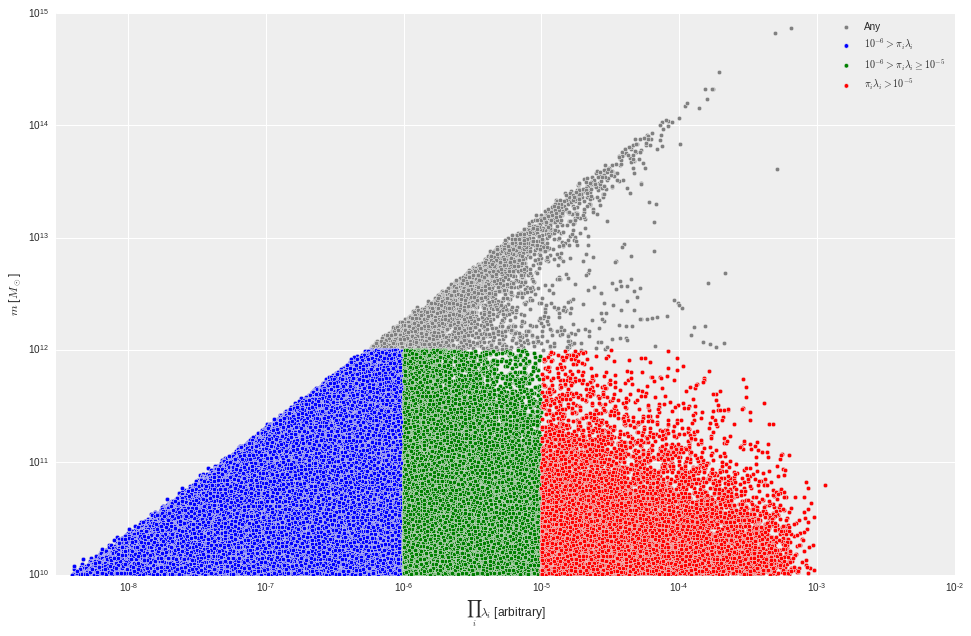

In [43]:
plt.figure()
zones = [
    (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) > -5][inertia_data['log(mass)'] < 12],
        r"$\pi_i \lambda_i > 10^{-5}$", "red"
    ), (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) <= -5][np.log10(inertia_data.eval('l0*l1*l2')) > -6][inertia_data['log(mass)'] < 12],
        r"$10^{-6} > \pi_i \lambda_i \geq 10^{-5}$", "green"
    ), (
        inertia_data[np.log10(inertia_data.eval('l0*l1*l2')) <= -6][inertia_data['log(mass)'] < 12],
         r"$10^{-6} > \pi_i \lambda_i$", "blue"
    ), (inertia_data, #[inertia_data['log(mass)'] < 12],
        "Any", "grey"
    )
]
zones.reverse()
for use_unit in [True, False]:
    plt.clf()
    if use_unit:
        conv_factor = RamsesOutput.info['unit_length'].express(C.kpc)**3
    else:
        conv_factor = 1


    for zone, label, color in zones:
        plt.scatter(zone.eval('l0*l1*l2')*conv_factor, zone['mass'], label=label, c=color)
    # tmp = inertia_data
    # plt.scatter(np.log10(tmp.eval('l0*l1*l2')), tmp['log(mass)'], marker='.',
    #             cmap='viridis', label=None)

    # tmp = inertia_data[inertia_data['log(mass)'] <= 11][np.log10(inertia_data.eval('l0*l1*l2')) > -4]
    # plt.scatter(np.log10(tmp.eval('l0*l1*l2')), tmp['log(mass)'], marker='.', c='red', label='Zone 1',
    #             cmap='viridis')

    # tmp2 = inertia_data[inertia_data['log(mass)'] <= 11][np.log10(inertia_data.eval('l0*l1*l2')) < -7]
    # plt.scatter(np.log10(tmp2.eval('l0*l1*l2')), tmp2['log(mass)'], marker='.', c='green', label='Zone 2',
    #             cmap='viridis')
    plt.loglog(basex=10, basey=10)
    plt.xlim(xmin=3e-9*conv_factor) # the minimum is 1e-6 in Mpc³
    plt.legend()
    plt.xlabel('$\prod_i\lambda_i$ [%s]' % ('$\mathrm{kpc}^3$' if use_unit else 'arbitrary'))
    plt.ylabel('$m$ [$M_\odot$]')

    plt.savefig('/home/cadiou/plots/volume__mass__zones%s.png' % ('_kpc3' if use_unit else ''))

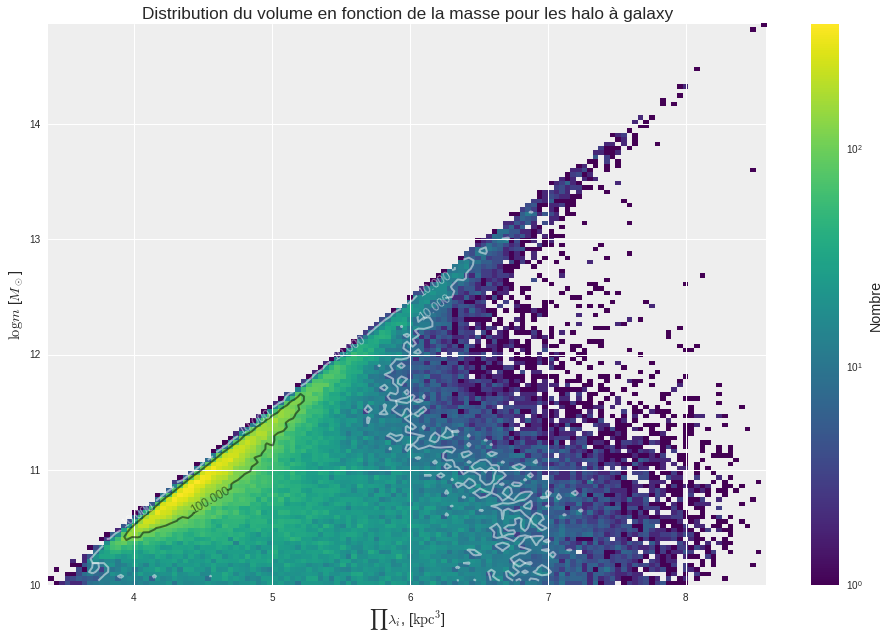

In [41]:
plt.figure()
mask = inertia_data['host_gal'] == True

for use_unit in [True]:
    plt.clf()
    if use_unit:
        conv_factor = RamsesOutput.info['unit_length'].express(C.kpc)**3
    else:
        conv_factor = 1

    zone = inertia_data[inertia_data['sigma_over_vtheta'] > 0]

    volume = np.log10(zone.eval('l0*l1*l2')*conv_factor)
    mass   = np.log10(zone['mass'])
    counts, xe, ye, img = plt.hist2d(volume, mass, bins=128, cmap='viridis', cmin=1, norm=LogNorm())#, xlim=(-5+np.log10(conv_factor), -2+np.log10(conv_factor)))
    cs = plt.contour(xe[1:], ye[1:], counts.T, alpha=0.5, norm=LogNorm())
    plt.clabel(cs, inline=1)

    plt.xlabel(r'$\prod \lambda_i$, [$\mathrm{kpc}^3$]')
    plt.ylabel('$\log m$ [$M_\odot$]')
    
    plt.title(u'Distribution du volume en fonction de la masse pour les halo à galaxy')
    cb = plt.colorbar(img)
    cb.set_label('Nombre')

    plt.savefig('/home/cadiou/plots/volume__mass__zones%s__has_galaxy.png' % ('_kpc3' if use_unit else ''))

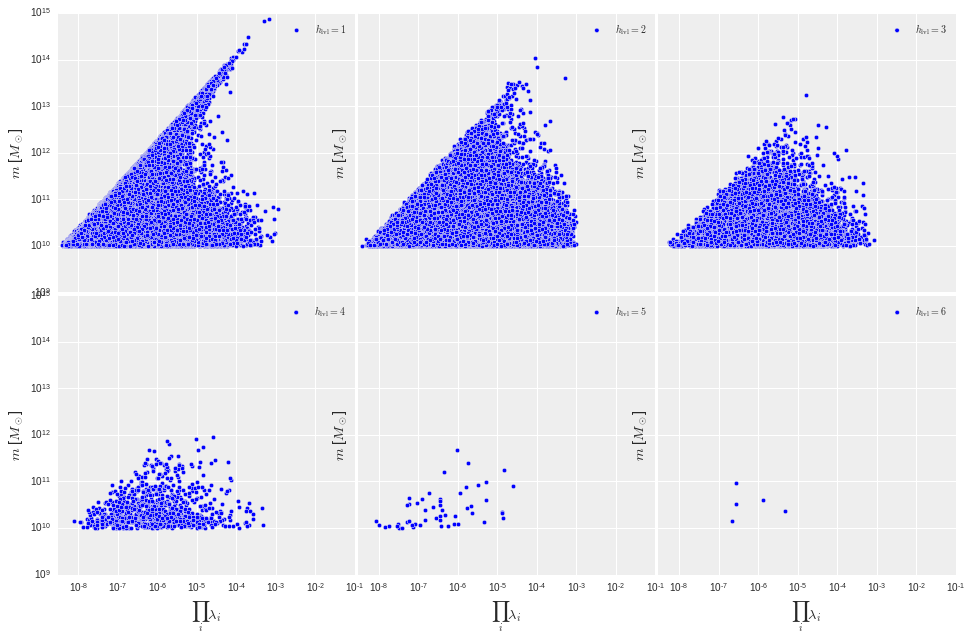

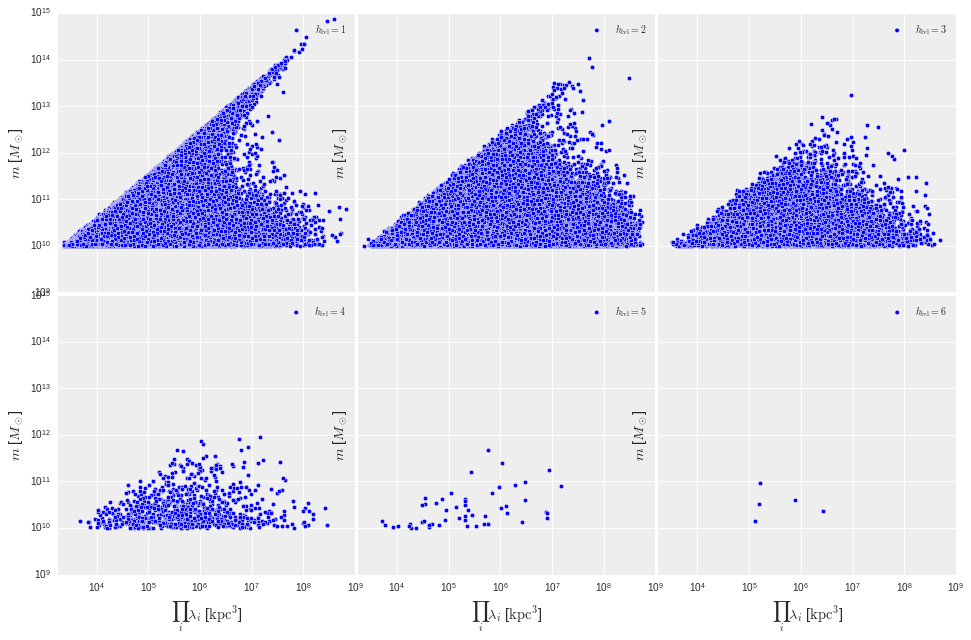

In [33]:
for use_unit in [False, True]:
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
    if use_unit:
        conv_factor = RamsesOutput.info['unit_length'].express(C.kpc)**3
    else:
        conv_factor = 1
    
    for lvl in range(1, 7):
        ax = axes.flatten()[lvl-1]
        tmp = inertia_data[inertia_data['hlevel'] == lvl]
        ax.scatter(tmp.eval('l0*l1*l2')*conv_factor, tmp['mass'], label='$h_\mathrm{lvl} = %s$' % lvl)
        ax.legend()

        ax.loglog()
        ax.set_xlabel('$\prod_i\lambda_i$ %s' % ('[$\mathrm{kpc}^3$]' if use_unit else ''))
        ax.set_ylabel('$m$ [$M_\odot$]')
        ax.set_xlim(xmin=3e-9*conv_factor)

    plt.subplots_adjust(hspace=0.01, wspace=0.01)
    plt.savefig('/home/cadiou/plots/volume__mass__hlvl%s.png' % ('_kpc3' if use_unit else ''))

/home/cadiou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


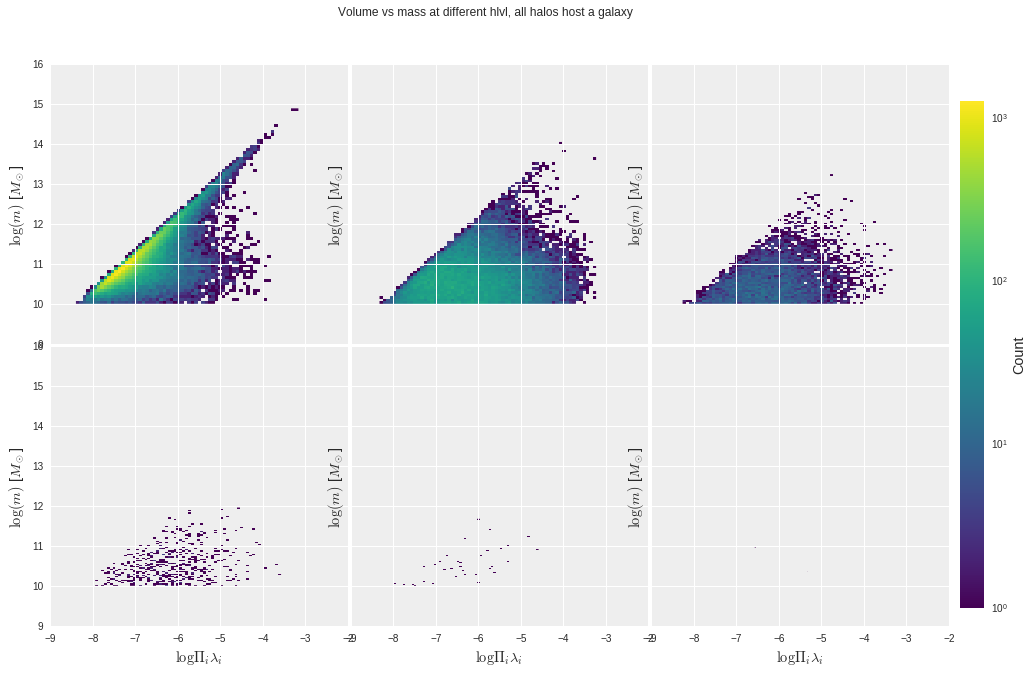

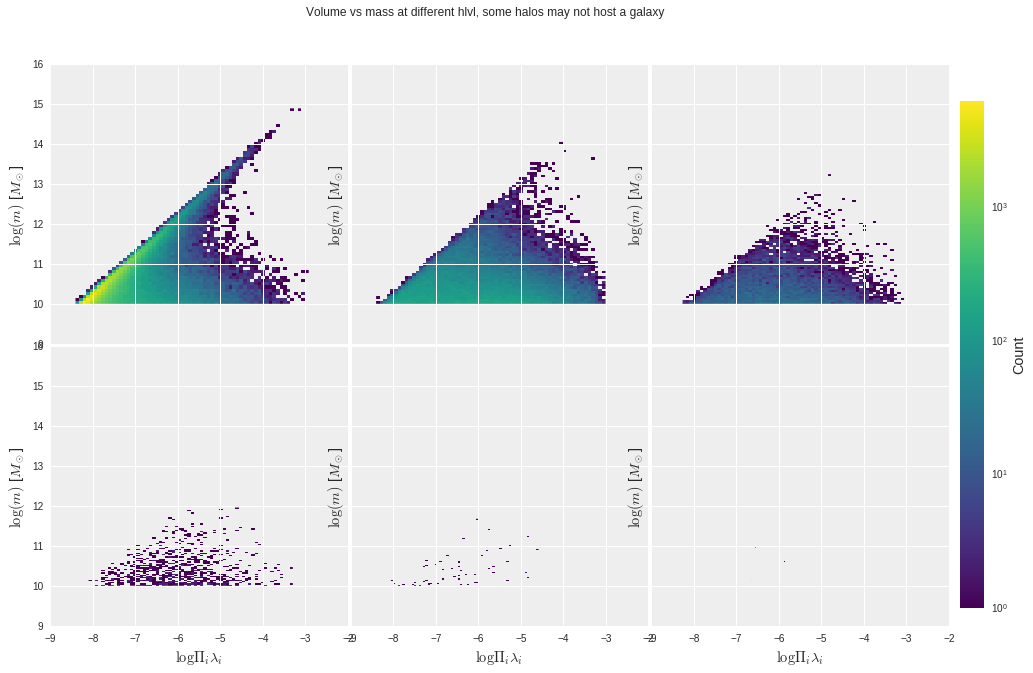

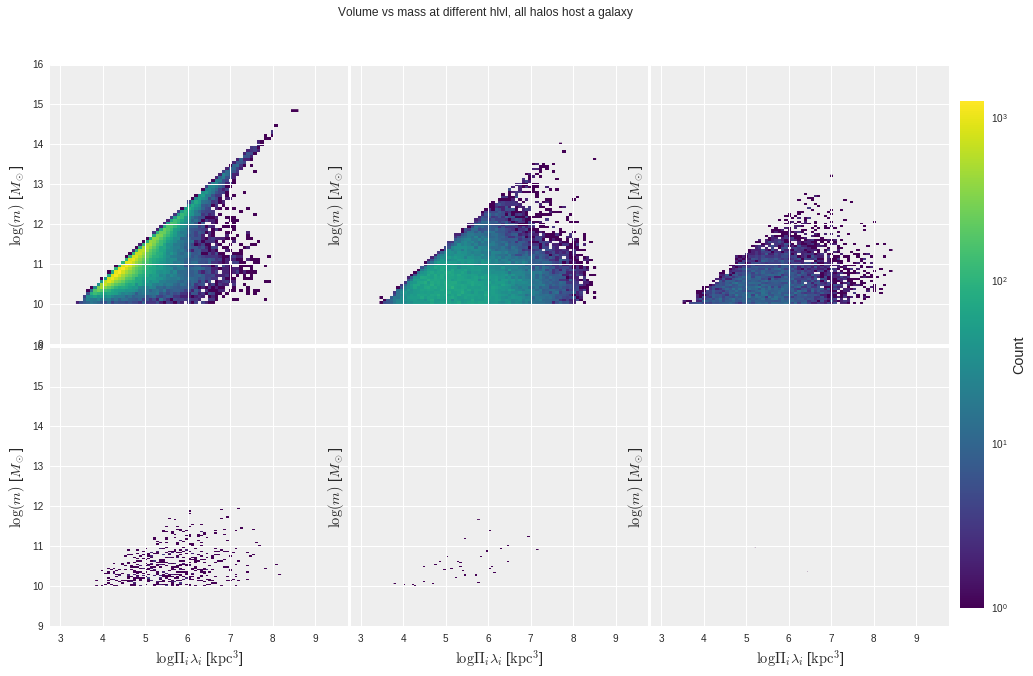

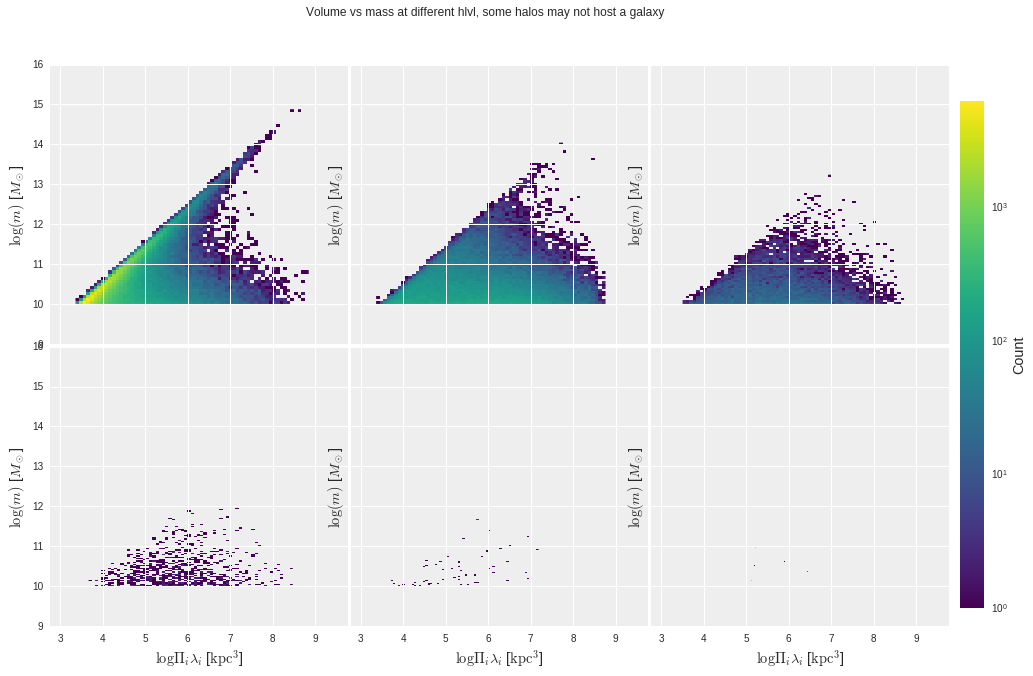

In [39]:
for use_unit, host_gal in itertools.product([False, True], [True, False]):
    fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
    if use_unit:
        conv_factor = RamsesOutput.info['unit_length'].express(C.kpc)**3
    else:
        conv_factor = 1

    n = LogNorm()
    nbins = 64
    for lvl in range(1, 7):
        ax = axes.flatten()[lvl-1]
        if host_gal:
            mask = inertia_data.host_gal == True
            tmp = inertia_data[inertia_data['hlevel'] == lvl][mask]
        else:
            tmp = inertia_data[inertia_data['hlevel'] == lvl]

        _,_,_, img = ax.hist2d(np.log10(tmp.eval('l0*l1*l2')*conv_factor), tmp['log(mass)'], cmap='viridis', bins=nbins, cmin=1, norm=n)
        ax.legend([], ['$h_\mathrm{lvl} = %s$' % lvl])

        ax.set_xlabel('$\log\Pi_i\lambda_i$ %s' % ('[$\mathrm{kpc}^3$]' if use_unit else ''))
        ax.set_ylabel('$\log(m)$ [$M_\odot$]')


    ax.set_xlim(-9 + np.log10(conv_factor), -2 + np.log10(conv_factor))
    ax.set_ylim(9, 16)
    plt.subplots_adjust(hspace=0.01, wspace=0.01, right=0.90)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
    cb = plt.colorbar(img, cax=cbar_ax)
    cb.set_label('Count')
    
    if host_gal:
        fig.suptitle('Volume vs mass at different hlvl, all halos host a galaxy')
    else:
        fig.suptitle('Volume vs mass at different hlvl, some halos may not host a galaxy')
    plt.savefig('/home/cadiou/plots/volume__mass__each_hlvl_separated__hist2d%s%s.png' % ('_kpc3' if use_unit else '', '__with_gal' if host_gal else ''))

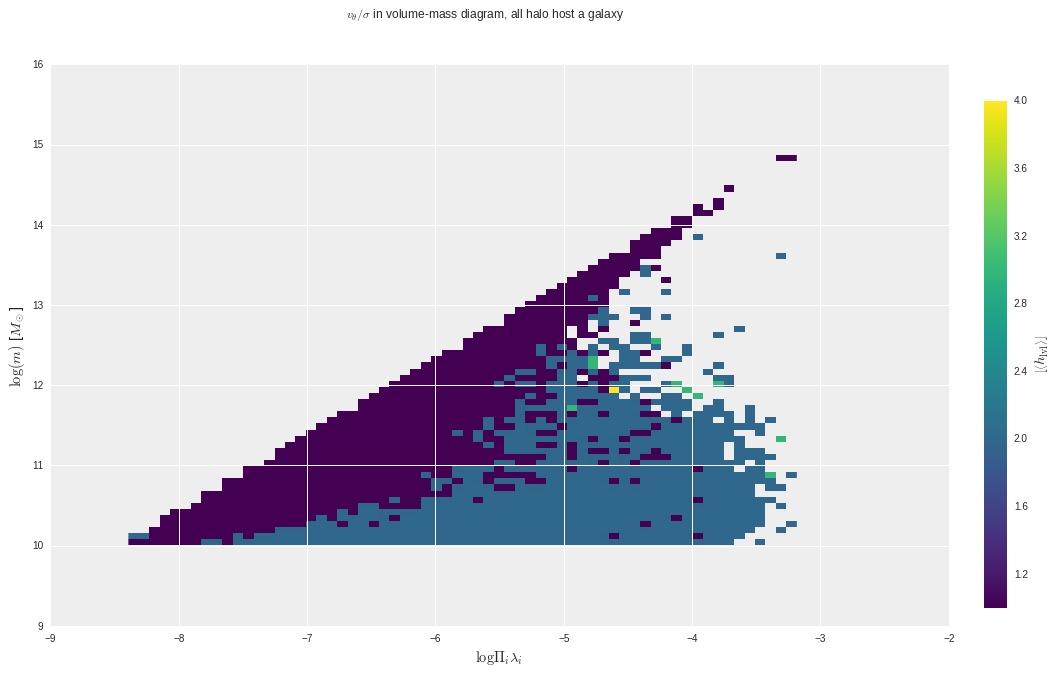

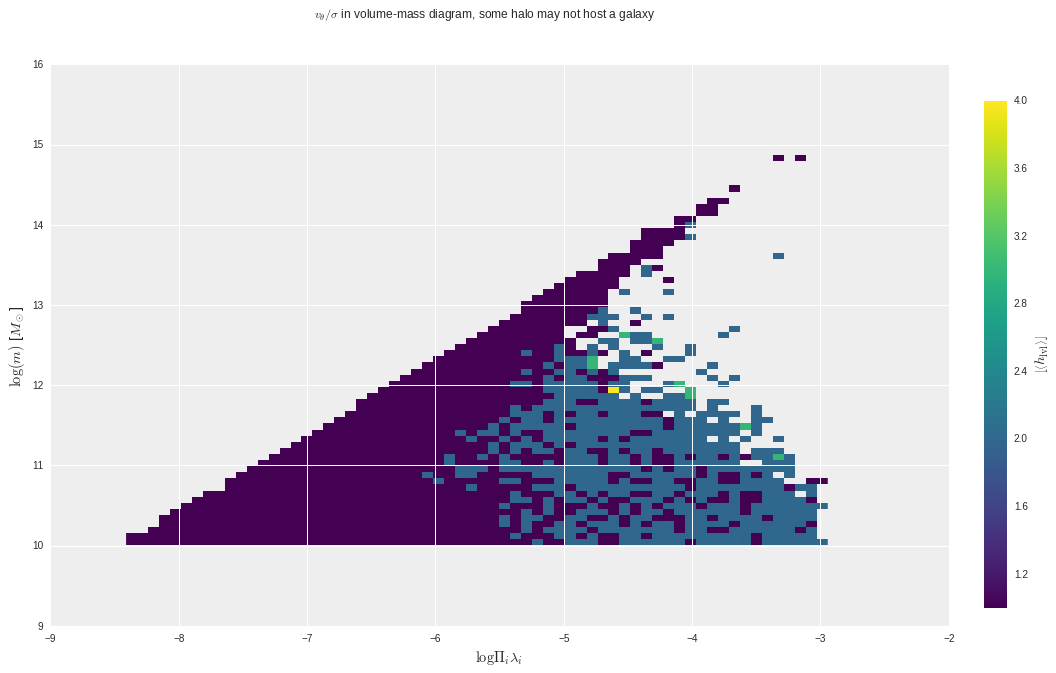

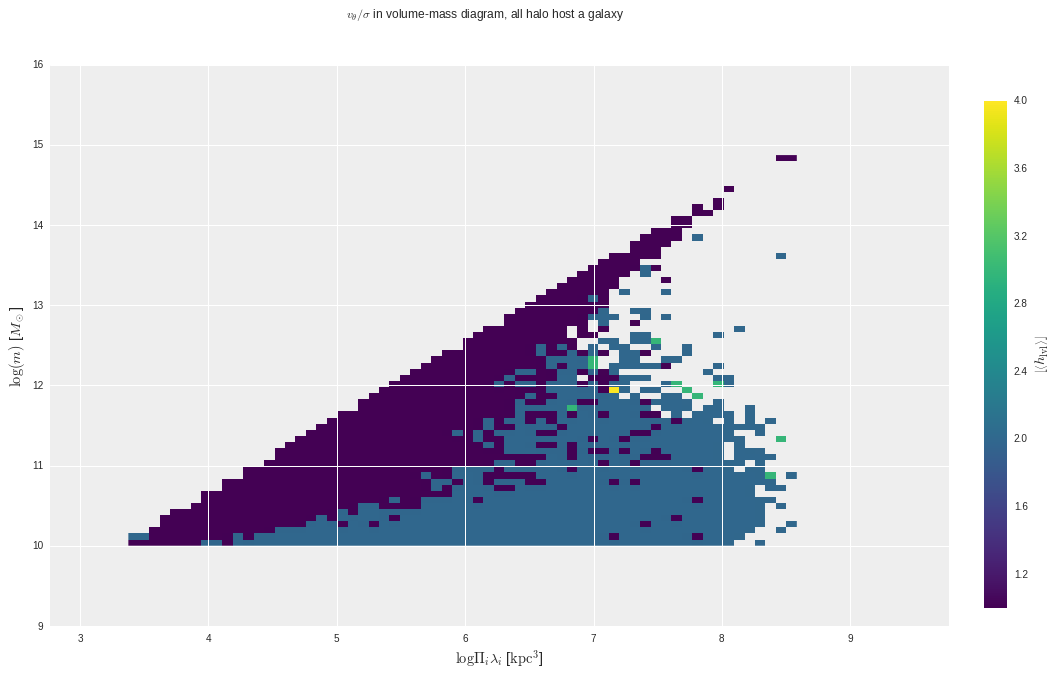

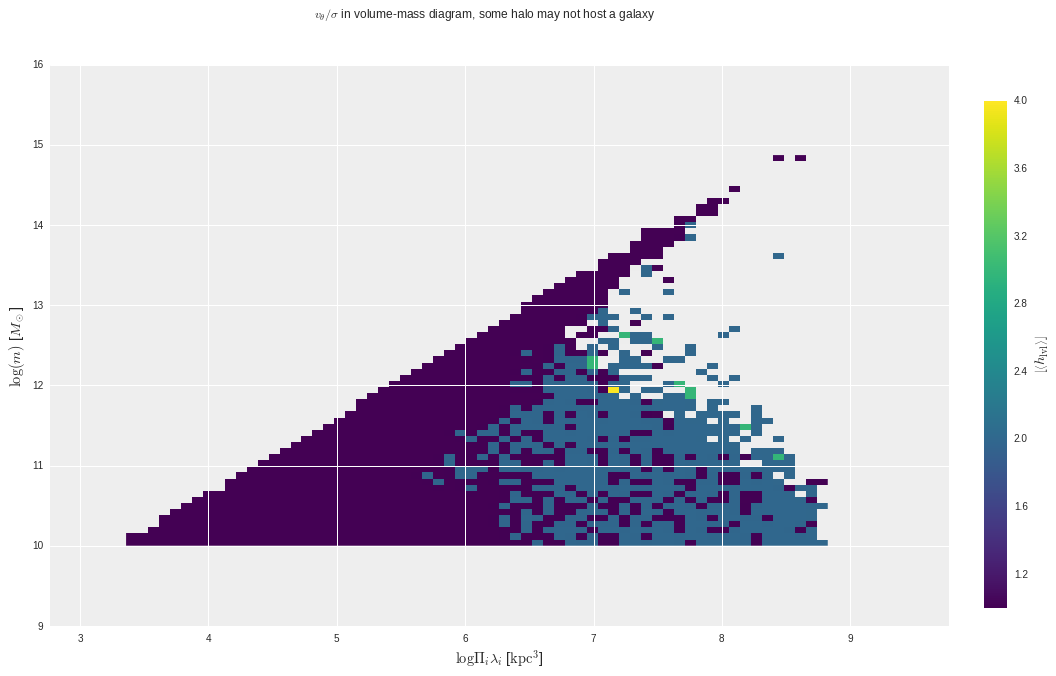

In [43]:
for use_unit, host_gal in itertools.product([False, True], [True, False]):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
    if use_unit:
        conv_factor = RamsesOutput.info['unit_length'].express(C.kpc)**3
    else:
        conv_factor = 1

    n = Normalize()
    bins = 128

    if host_gal:
        tmp = inertia_data[inertia_data.host_gal == True]
    else:
        tmp = inertia_data

    bin_sum, _, _           = np.histogram2d(np.log10(tmp.eval('l0*l1*l2')*conv_factor), tmp['log(mass)'], weights=tmp['hlevel'], bins=nbins, normed=False)
    bin_count, xedge, yedge = np.histogram2d(np.log10(tmp.eval('l0*l1*l2')*conv_factor), tmp['log(mass)'], bins=nbins)

    extent = (xedge[0], xedge[-1], yedge[0], yedge[-1])

    img = ax.imshow(np.floor(bin_sum/bin_count).T, cmap='viridis', origin='lower', interpolation='none',
                    extent=extent, 
                    aspect='auto', norm=n)

    #_,_,_, img = ax.hist2d(np.log10(tmp.eval('l0*l1*l2')), tmp['log(mass)'], cmap='viridis', bins=nbins, cmin=1, norm=n)
    ax.legend([], ['$h_\mathrm{lvl} = %s$' % lvl])

    ax.set_xlabel('$\log\Pi_i\lambda_i$ %s' % ('[$\mathrm{kpc}^3$]' if use_unit else ''))
    ax.set_ylabel('$\log(m)$ [$M_\odot$]')

    # CS = ax.contourf(xedge[:-1], yedge[:-1], (bin_sum/bin_count).T)
    # ax.clabel(CS, fmt='%1.0f')

    ax.set_xlim(-9+np.log10(conv_factor), -2+np.log10(conv_factor))
    ax.set_ylim(9, 16)
    plt.subplots_adjust(hspace=0.01, wspace=0.01, right=0.90)
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
    cb = plt.colorbar(img, cax=cbar_ax)
    cb.set_label(r'$\left\lfloor \left\langle h_\mathrm{lvl} \right\rangle \right\rfloor$')
    
    if host_gal:
        plt.suptitle(r'$v_\theta/\sigma$ in volume-mass diagram, all halo host a galaxy')
    else:
        plt.suptitle(r'$v_\theta/\sigma$ in volume-mass diagram, some halo may not host a galaxy')
    
    plt.savefig('/home/cadiou/plots/volume__mass__hlvl__4colors_hist2d%s%s.png' % ('_kpc3' if use_unit else '', '__host_gal' if host_gal else ''))

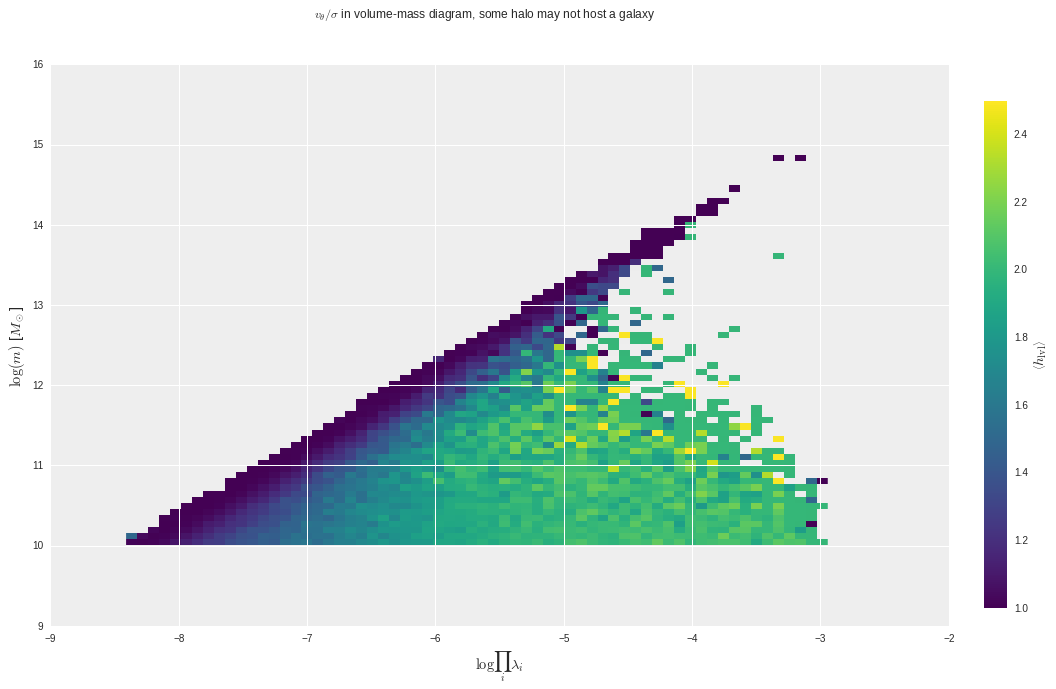

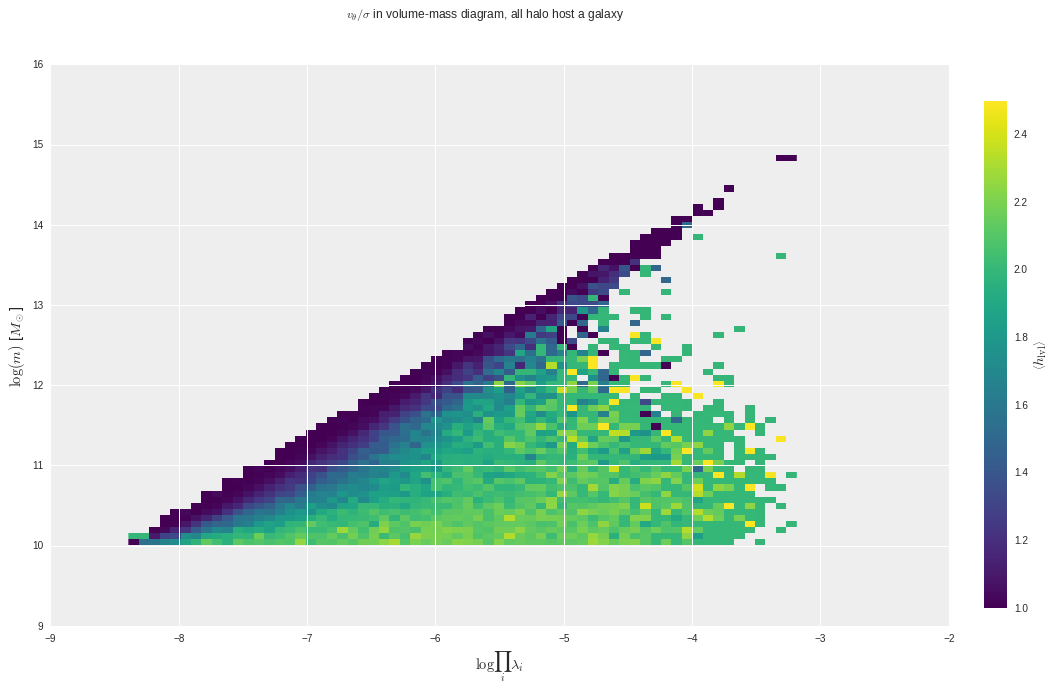

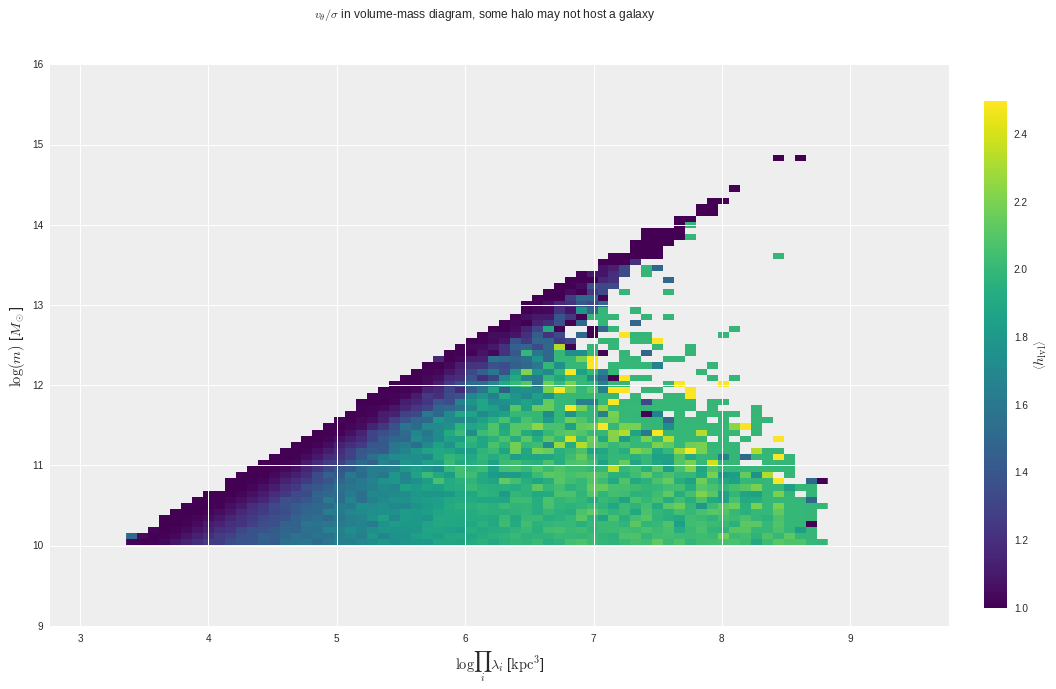

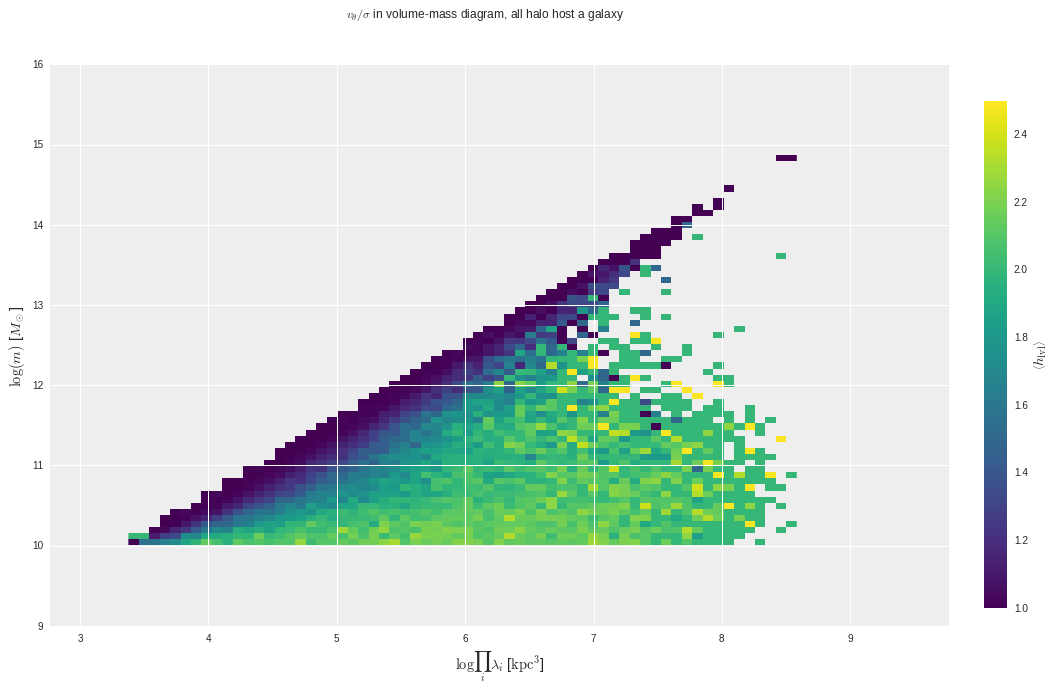

In [46]:
for use_unit, host_gal in itertools.product([False, True], [False, True]):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
    if use_unit:
        conv_factor = RamsesOutput.info['unit_length'].express(C.kpc)**3
    else:
        conv_factor = 1

    n = Normalize(vmax=2.5)
    bins = 128

    if host_gal:
        tmp = inertia_data[inertia_data.host_gal == True]
    else:
        tmp = inertia_data

    bin_sum, _, _           = np.histogram2d(np.log10(tmp.eval('l0*l1*l2')*conv_factor), tmp['log(mass)'], weights=tmp['hlevel'], bins=nbins, normed=False)
    bin_count, xedge, yedge = np.histogram2d(np.log10(tmp.eval('l0*l1*l2')*conv_factor), tmp['log(mass)'], bins=nbins)

    extent = (xedge[0], xedge[-1], yedge[0], yedge[-1])

    img = ax.imshow((bin_sum/bin_count).T, cmap='viridis', origin='lower', interpolation='none',
                    extent=extent, 
                    aspect='auto', norm=n)

    #_,_,_, img = ax.hist2d(np.log10(tmp.eval('l0*l1*l2')), tmp['log(mass)'], cmap='viridis', bins=nbins, cmin=1, norm=n)
    ax.legend([], ['$h_\mathrm{lvl} = %s$' % lvl])

    ax.set_xlabel('$\log\prod_i\lambda_i$ %s' % ('[$\mathrm{kpc}^3$]' if use_unit else ''))
    ax.set_ylabel('$\log(m)$ [$M_\odot$]')

    # CS = ax.contourf(xedge[:-1], yedge[:-1], (bin_sum/bin_count).T)
    # ax.clabel(CS, fmt='%1.0f')

    ax.set_xlim(-9+np.log10(conv_factor), -2+np.log10(conv_factor))
    ax.set_ylim(9, 16)
    plt.subplots_adjust(hspace=0.01, wspace=0.01, right=0.90)
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
    cb = plt.colorbar(img, cax=cbar_ax)
    
    if host_gal:
        plt.suptitle(r'$v_\theta/\sigma$ in volume-mass diagram, all halo host a galaxy')
    else:
        plt.suptitle(r'$v_\theta/\sigma$ in volume-mass diagram, some halo may not host a galaxy')
    cb.set_label(r'$\left\langle h_\mathrm{lvl} \right\rangle$')
    plt.savefig('/home/cadiou/plots/volume__mass__hlvl_hist2d%s%s.png' % ('_kpc3' if use_unit else '', '__host_gal' if host_gal else ''))

/home/cadiou/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


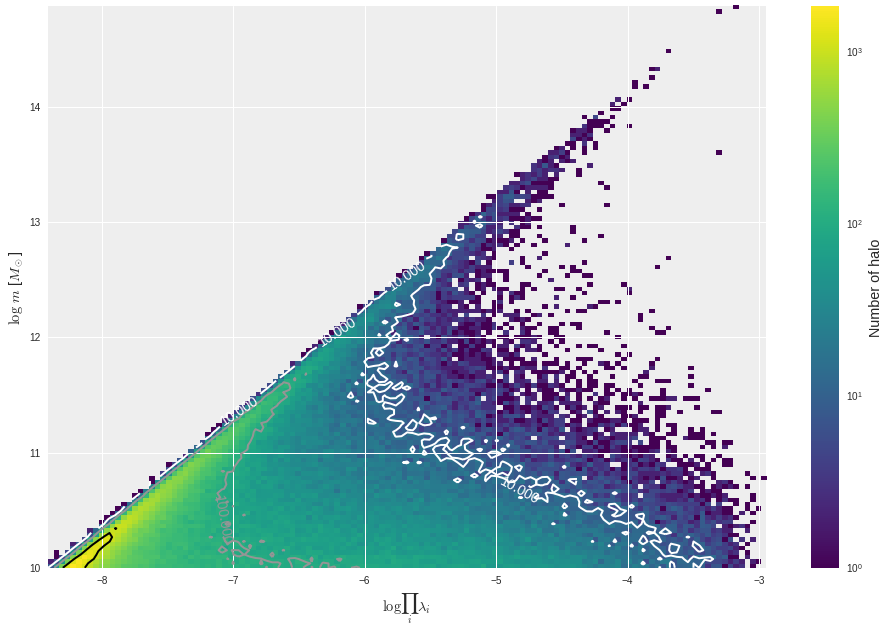

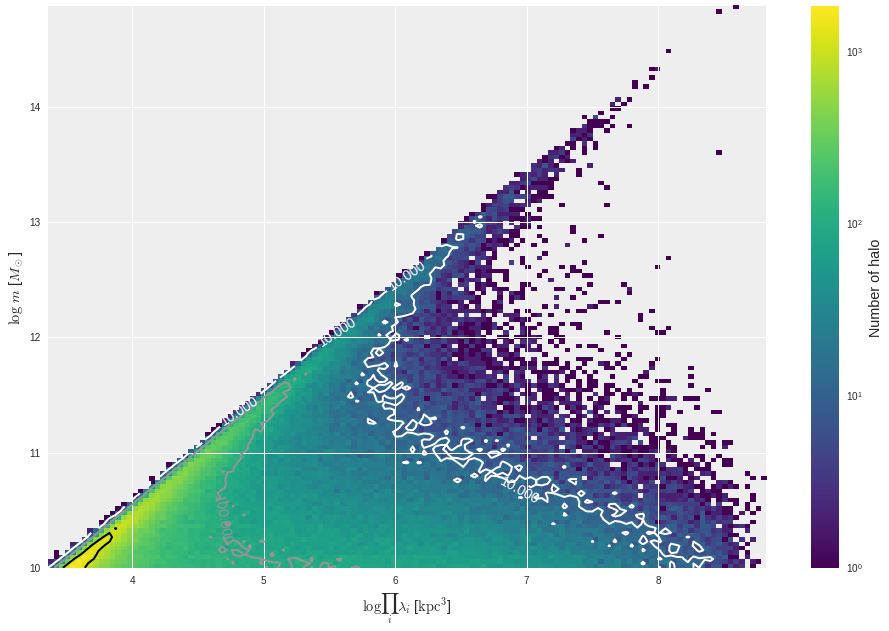

In [47]:
for use_unit in [False, True]:
    plt.figure()
    if use_unit:
        conv_factor = RamsesOutput.info['unit_length'].express(C.kpc)**3
    else:
        conv_factor = 1
        
    counts, xe, ye, img = plt.hist2d(np.log10(inertia_data.eval('l0*l1*l2')*conv_factor), inertia_data['log(mass)'], bins=128, norm=LogNorm(), cmap='viridis')
    CS = plt.contour(xe[:-1], ye[:-1], counts.T, cmap='Greys', norm=LogNorm())
    plt.clabel(CS, inline=1, fontsize=14)

    plt.xlabel(r'$\log\prod_i\lambda_i$ %s' % ('[$\mathrm{kpc}^3$]' if use_unit else ''))
    plt.ylabel(r'$\log\ m$ [$M_\odot$]')
    cb = plt.colorbar(img)
    cb.set_label('Number of halo')

plt.savefig('/home/cadiou/plots/lambda_i__mass__distribution%s.png' % ('_kpc3' if use_unit else ''))

## Tracé de quelques halos
### Fonctions python

In [ ]:
%%cython
from cython.parallel import prange
cimport numpy as np
import numpy as np

def my_periodic_filter(np.ndarray[double, ndim=1] center, double l, dataset):
    cdef int i 
    cdef np.ndarray[double, ndim=1] p
    cdef np.ndarray mask
    assert(0 < l < 1)
    mask = np.ones(dataset.points.shape[0], dtype=np.bool)
    for i in range(3):
        p = dataset.points[:, i]
        if 0 < center[i] + l < 1. :
            mask *= (center[i] - l <= p     ) * (p <= center[i] + l     )
        elif center[i] + l >= 1.:
            mask *= (p <= center[i] + l - 1.) + (p >= center[i] - l     )
        elif center[i] - l <= 0:
            mask *= (p <= center[i] + l     ) + (p >= center[i] - l + 1.)
    return mask

def id_filter_generator(members_set):
    def in_fun(pt):
        return pt in members_set

    vin_fun = np.vectorize(in_fun)
    def my_id_filter(dset):
        if len(dset['id']) == 0:
            return [False]
        else:
            return vin_fun(dset['id'])

    return my_id_filter

In [ ]:
def get_members(halo_data, halo_i, parts):
    '''Plot the halo with caracteristic of halo_data and id halo_i. Returns a data frame containing all the particles in it.'''
    members = halo_members[halo_i-1]['members']
    halo_points = pd.DataFrame({'mass': [], 'x': [], 'y':[], 'z': []})

    # create a sphere filter and an id filter
    my_id_filter     = id_filter_generator(set(members))

    def get_spheres(center, lin, lout):  
        sps = []
        def append(center, lin, lout):
            if lin == 0:
                sps.append(pymses.utils.regions.Sphere(center, lout))
            else:
                sps.append(pymses.utils.regions.SphericalShell(center, lin, lout))

        for i in range(3):
            if (center[i] - lout < 0):
                tmp = np.copy(center)
                tmp[i] += 1
                append(tmp, lin, lout)
            if (center[i] + lout > 1.):
                tmp = np.copy(center)
                tmp[i] -= 1
                append(tmp, lin, lout)

        append(center, lin, lout)
        return sps

    lin = lout = 0
    step = halo_data['l2']
    counter = 0
    while halo_points['x'].size < len(members):
        counter += 1
        lin  = lout
        lout = lout + step
        print('r < %s, %s'% (lout, halo_data[['x', 'y', 'z']]))

        sps = get_spheres(np.array(halo_data[['x', 'y', 'z']]), lin, lout)
        id_src     = pymses.filters.PointFunctionFilter(my_id_filter, parts)
        #id_src     = pymses.filters.PointIdFilter(members, parts)
        sources    = [pymses.filters.RegionFilter(sp, id_src) for sp in sps]

        for src in tqdm(sources):
            dset = src.flatten()
            print(len(dset['id']), '/', len(members))
            halo_points = halo_points.append(pd.DataFrame({
                        'id': dset['id'],
                        'mass': dset['mass'],
                        'x': dset.points[:, 0],
                        'y': dset.points[:, 1],
                        'z': dset.points[:, 2]}))
        print('Found {}/{} particles'.format(halo_points['id'].size, len(members)))
    return halo_points

### Do some plots

In [ ]:
randint = np.random.randint(len(tmp2.index))
tmp2.loc[tmp2.index[randint]:tmp2.index[randint]]

In [ ]:
ro = pymses.RamsesOutput('/data52/Horizon-AGN/OUTPUT_DIR/', 2, verbose=False)
parts = ro.particle_source(["pos", "mass", "id"])
ro.verbose = False

In [ ]:
id = 93717
inertia_data.loc[id:id]

In [ ]:
# Correct positions
xyz = ['x', 'y', 'z']
maxmin = halo_points[xyz].max() - halo_points[xyz].min()
for i in range(3):
    col = xyz[i]
    if maxmin[i] > 0.5:
        halo_points[col][halo_points[col] > 0.5] = halo_points[col] - 1.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
to_Mpc = ro.info['unit_length'].express(C.Mpc)
ax.scatter3D(halo_points.x*to_Mpc, halo_points.y*to_Mpc, halo_points.z*to_Mpc)
ax.set_xlabel('x [Mpc]')
ax.set_ylabel('y [Mpc]')
ax.set_zlabel('z [Mpc]')
title = ('Halo %s @ $z=%s$' % (id, np.round(1./ro.info['aexp'] - 1, 1)) +
         '  $\lambda_2\lambda_1\lambda_0 = %s$, $\log\ m = %s$' % (np.round(np.log10(inertia_data.eval('l0*l1*l2')).loc[id], 1), np.round(inertia_data.loc[id, 'log(mass)'], 1)))
ax.set_title(title)
_ = plt.savefig('/home/cadiou/plots/halo_%s_z=17.pdf' % id)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(halo_points.x, halo_points.y, halo_points.z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
title = ('Halo %s @ $z=%s$' % (id, np.round(1./ro.info['aexp'] - 1, 1)) +
         '  $\lambda_2\lambda_1\lambda_0 = %s$, $\log\ m = %s$' % (np.round(np.log10(inertia_data.eval('l0*l1*l2')).loc[id], 1), np.round(inertia_data.loc[id, 'log(mass)'], 1)))
ax.set_title(title)
_ = plt.savefig('/home/cadiou/plots/halo_%s_z=17_no_unit.pdf' % id)

## Vérification de l'énumération des particules
On vérifie que les particules sont correctement énumérées en suivant au cours du temps l'évolution d'un halo diffus

### Sélection d'un halo au hasard
on prend un halo dans la zone inférieur droite du plot suivant

In [ ]:
plt.figure(figsize=(8, 8))
ax = plt.gca()
_ = plt.hist2d(inertia_data['log(prod_li)'], inertia_data['log(mass)'], bins=128, cmin=1, cmap='viridis', norm=LogNorm())

zone = inertia_data[inertia_data['log(prod_li)'] > -4][inertia_data['log(mass)'] < 11][inertia_data.sigma_over_vtheta > 0]
index = zone.index
i = np.random.randint(len(index))
halo = zone.loc[index[i]]
_ = plt.plot(halo['log(prod_li)'], halo['log(mass)'], 'ro')
plt.title(u'Halo n°%s' % int(index[i]))

## $\frac{\sqrt{\lambda_2\lambda_1}}{\lambda_0}$ en fonction de $v_\theta/\sigma$
On cherche une relation entre l'oblacité et $v_\theta/\sigma$ en faisant des bins de masse

In [21]:
inertia_data.head()

,mass,x,y,z,xx,xy,xz,yy,yz,zz,...,log(sigma_over_vtheta),hlevel,prolacity,log(prolacity),oblacity,log(oblacity),prod_li,log(prod_li),vtheta_over_sigma,galaxy_type
id,,,,,,,,,,,,,,,,,,,,,
1.0,2.447530e+10,0.054218,0.036724,0.032693,0.000006,9.182875e-07,1.416061e-06,0.000009,1.537712e-06,0.000007,...,NaN,1.0,1.335112,0.125518,1.282377,0.108016,1.832708e-08,-7.736907,NaN,NaN
2.0,7.453690e+11,0.037340,0.004005,0.011199,0.000050,-1.573558e-06,5.984283e-06,0.000061,8.054604e-07,0.000055,...,-0.292897,1.0,1.083632,0.034882,1.141609,0.057518,4.066017e-07,-6.390831,1.962894,spiral
3.0,1.762556e+10,0.049809,0.010437,0.000391,0.000004,-3.722408e-07,1.590209e-06,0.000008,9.675968e-07,0.000008,...,NaN,1.0,1.372177,0.137410,1.634044,0.213264,1.459578e-08,-7.835773,NaN,NaN
4.0,1.445129e+10,0.016944,0.043184,0.005668,0.000004,-1.076017e-06,3.801652e-07,0.000004,-5.158914e-07,0.000006,...,NaN,1.0,1.318882,0.120206,1.385589,0.141635,9.561660e-09,-8.019467,NaN,NaN
5.0,8.762659e+10,0.001566,0.046257,0.035597,0.000037,-4.088153e-06,-7.649228e-06,0.000009,2.248367e-06,0.000019,...,NaN,1.0,1.880339,0.274236,1.779091,0.250198,7.329478e-08,-7.134927,NaN,NaN


/home/cadiou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


                        log(oblateness)  log(sigma_over_vtheta)
log(oblateness)                1.000000                0.053429
log(sigma_over_vtheta)         0.053429                1.000000
                        log(oblateness)  log(sigma_over_vtheta)
log(oblateness)                 1.00000                -0.17568
log(sigma_over_vtheta)         -0.17568                 1.00000
                        log(oblateness)  log(sigma_over_vtheta)
log(oblateness)                1.000000               -0.005653
log(sigma_over_vtheta)        -0.005653                1.000000
                        log(oblateness)  log(sigma_over_vtheta)
log(oblateness)                1.000000               -0.174493
log(sigma_over_vtheta)        -0.174493                1.000000


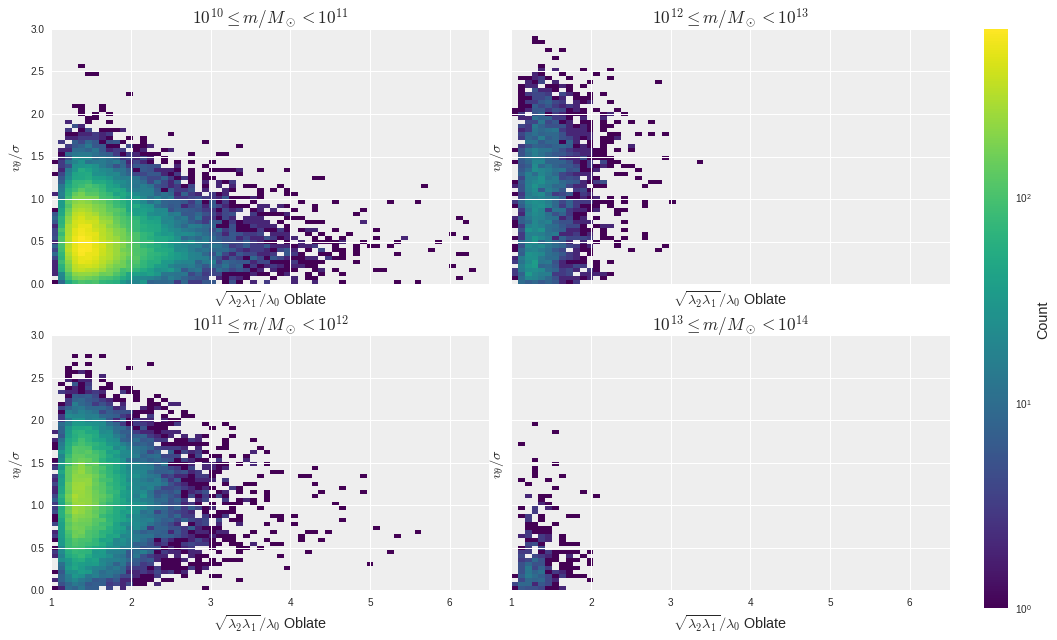

In [49]:
f, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
n = LogNorm()

bounds = [[1, 6.5], [0, 3]]
for i in range(2):
    for j in range(2):
        _tmp = inertia_data[10+i+2*j <= inertia_data['log(mass)']][inertia_data['log(mass)'] < 11+i+2*j][inertia_data.host_gal == True]
        ax = axes[i,j]
        _,_,_,img = ax.hist2d(_tmp['oblateness'], 1./_tmp['sigma_over_vtheta'], bins=64, cmin=1, norm=n, cmap='viridis', range=bounds)
        ax.set_xlabel(r'$\sqrt{\lambda_2 \lambda_1} /  \lambda_0$ Oblate')
        ax.set_ylabel(r'$v_\theta / \sigma$')
        ax.set_title(r'$10^{%s} \leq m/M_\odot < 10^{%s}$' % (10+i+2*j, 11+i+2*j))
        
        print(_tmp[['log(oblateness)', 'log(sigma_over_vtheta)']].corr())
        
ax.set_xlim(bounds[0])
ax.set_ylim(bounds[1])
plt.subplots_adjust(wspace=0.05,right=0.90)
cbar_ax = f.add_axes([0.93, 0.1, 0.02, 0.8])
cb = plt.colorbar(img, cax=cbar_ax)
cb.set_label(r'Count')

plt.savefig('/home/cadiou/plots/oblate__vtheta_o_sigma__hist2d.png')

/home/cadiou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


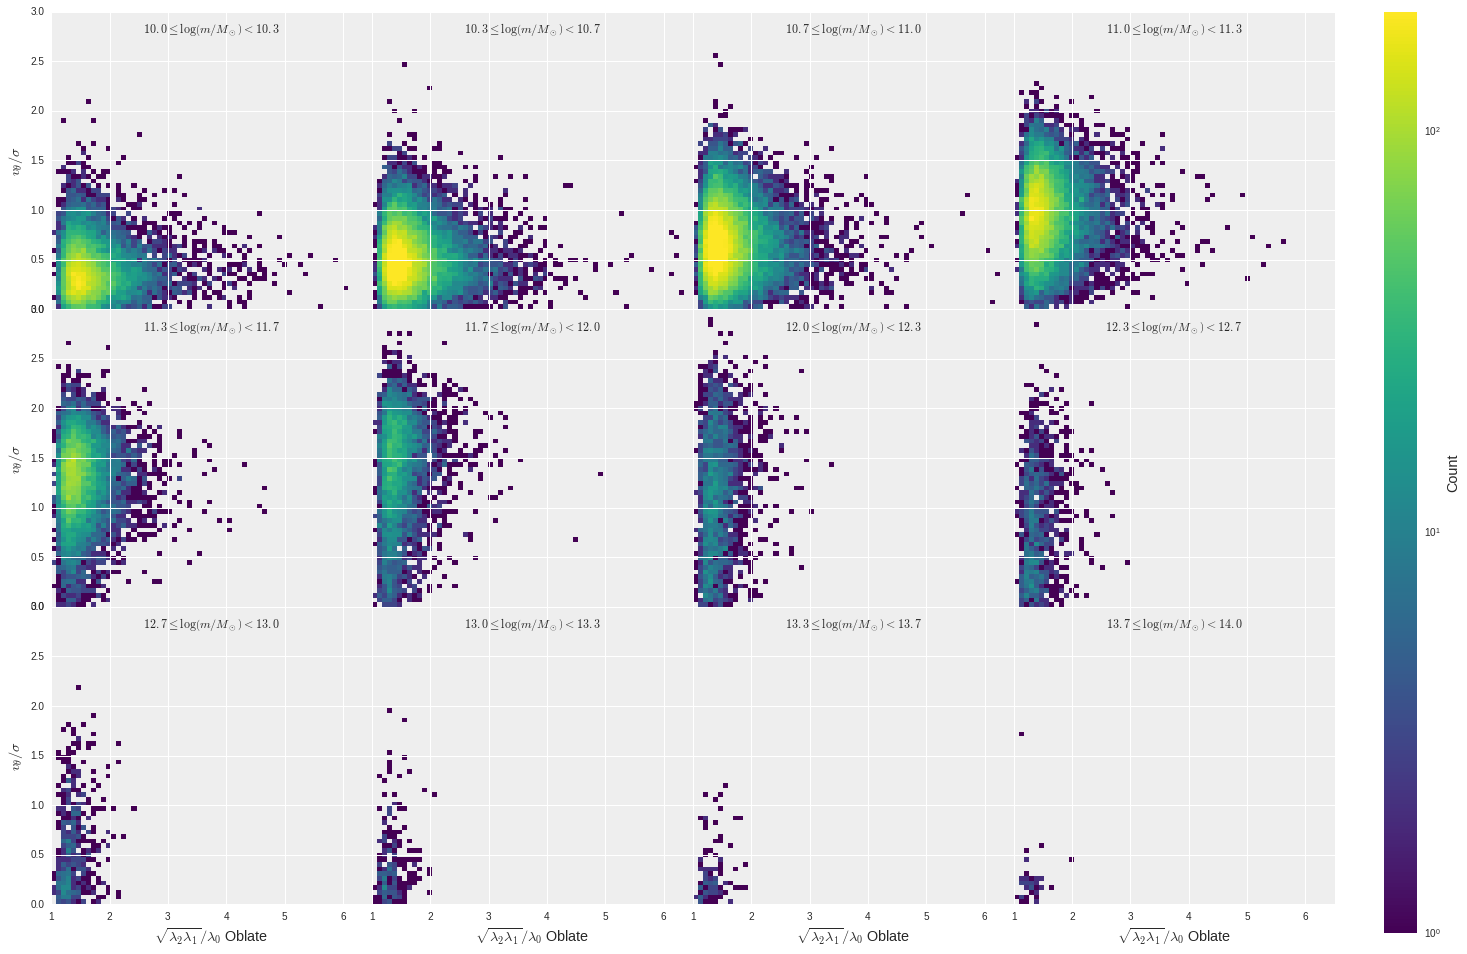

In [95]:
nrows, ncols = 3, 4
plt.figure(figsize=(23, 16))
f, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(23, 16))
n = LogNorm()

bounds = [[1, 6.5], [0, 3]]
bins = np.linspace(10, 14, nrows*ncols+1)
for i in range(ncols):
    for j in range(nrows):
        lbound, ubound = bins[i+j*ncols], bins[i+j*ncols+1]
        _tmp = inertia_data[inertia_data['log(mass)'] >= lbound][inertia_data['log(mass)'] < ubound][inertia_data['host_gal'] == True]
        ax = axes[j, i]
        _,_,_,img = ax.hist2d(_tmp['oblateness'], _tmp['vtheta_over_sigma'], bins=64, cmin=1, norm=n, cmap='viridis', range=bounds)
        
        if j == nrows - 1:
            ax.set_xlabel(r'$\sqrt{\lambda_2 \lambda_1} /  \lambda_0$ Oblate')
        if i == 0:
            ax.set_ylabel(r'$v_\theta / \sigma$')
        
        ax.text(0.5, 0.97,
                r'$%.1f \leq \log\left(m/M_\odot\right) < %.1f$' % (lbound, ubound),
                horizontalalignment='center', verticalalignment='top', fontsize=12,
                transform=ax.transAxes,)
                
ax.set_xlim(bounds[0])
ax.set_ylim(bounds[1])
plt.subplots_adjust(wspace=0, hspace=0, right=0.90)
cbar_ax = f.add_axes([0.93, 0.1, 0.02, 0.8])
cb = plt.colorbar(img, cax=cbar_ax)
cb.set_label(r'Count')

plt.savefig('/home/cadiou/plots/oblate__vtheta_o_sigma__mass_bins.png')

/home/cadiou/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


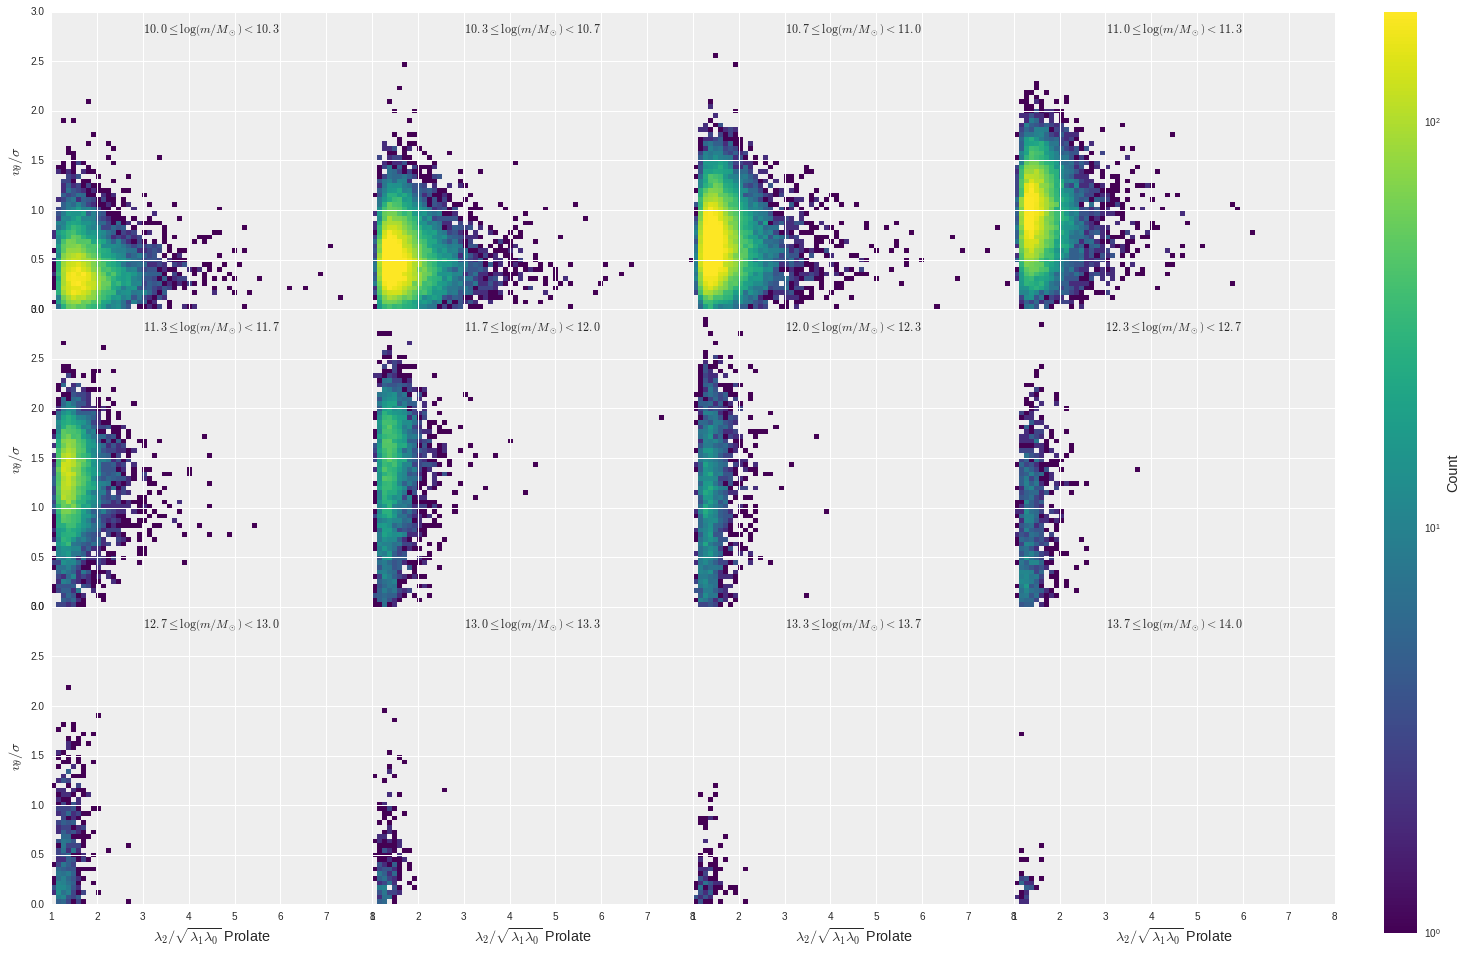

In [98]:
nrows, ncols = 3, 4
plt.figure(figsize=(23, 16))
f, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(23, 16))
n = LogNorm()

bounds = [[1, 8], [0, 3]]
bins = np.linspace(10, 14, nrows*ncols+1)
for i in range(ncols):
    for j in range(nrows):
        lbound, ubound = bins[i+j*ncols], bins[i+j*ncols+1]
        _tmp = inertia_data[inertia_data['log(mass)'] >= lbound][inertia_data['log(mass)'] < ubound][inertia_data['host_gal'] == True]
        ax = axes[j, i]
        _,_,_,img = ax.hist2d(_tmp['prolateness'], _tmp['vtheta_over_sigma'], bins=64, cmin=1, norm=n, cmap='viridis', range=bounds)
        
        if j == nrows - 1:
            ax.set_xlabel(r'$\lambda_2 / \sqrt{\lambda_1 \lambda_0}$ Prolate')
        if i == 0:
            ax.set_ylabel(r'$v_\theta / \sigma$')
        
        ax.text(0.5, 0.97,
                r'$%.1f \leq \log\left(m/M_\odot\right) < %.1f$' % (lbound, ubound),
                horizontalalignment='center', verticalalignment='top', fontsize=12,
                transform=ax.transAxes,)
                
ax.set_xlim(bounds[0])
ax.set_ylim(bounds[1])
plt.subplots_adjust(wspace=0, hspace=0, right=0.90)
cbar_ax = f.add_axes([0.93, 0.1, 0.02, 0.8])
cb = plt.colorbar(img, cax=cbar_ax)
cb.set_label(r'Count')

plt.savefig('/home/cadiou/plots/prolate__vtheta_o_sigma__mass_bins.png')

In [58]:
lbound

10.0

<IPython.core.display.Javascript object>


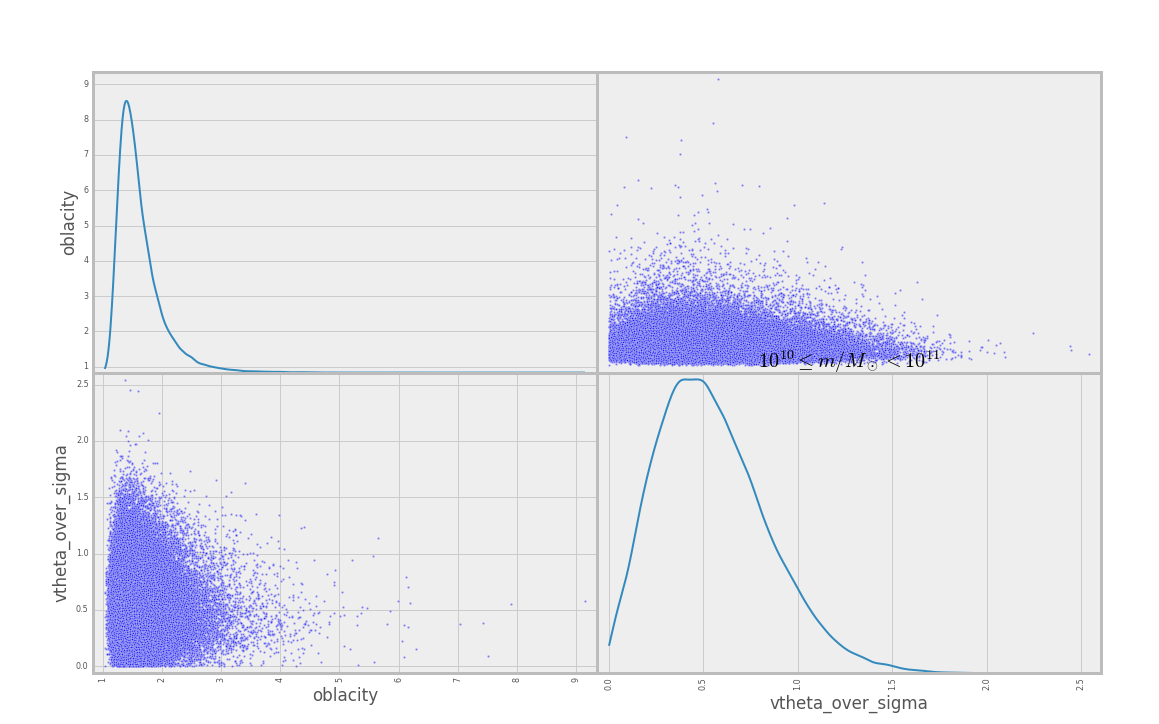

<IPython.core.display.Javascript object>


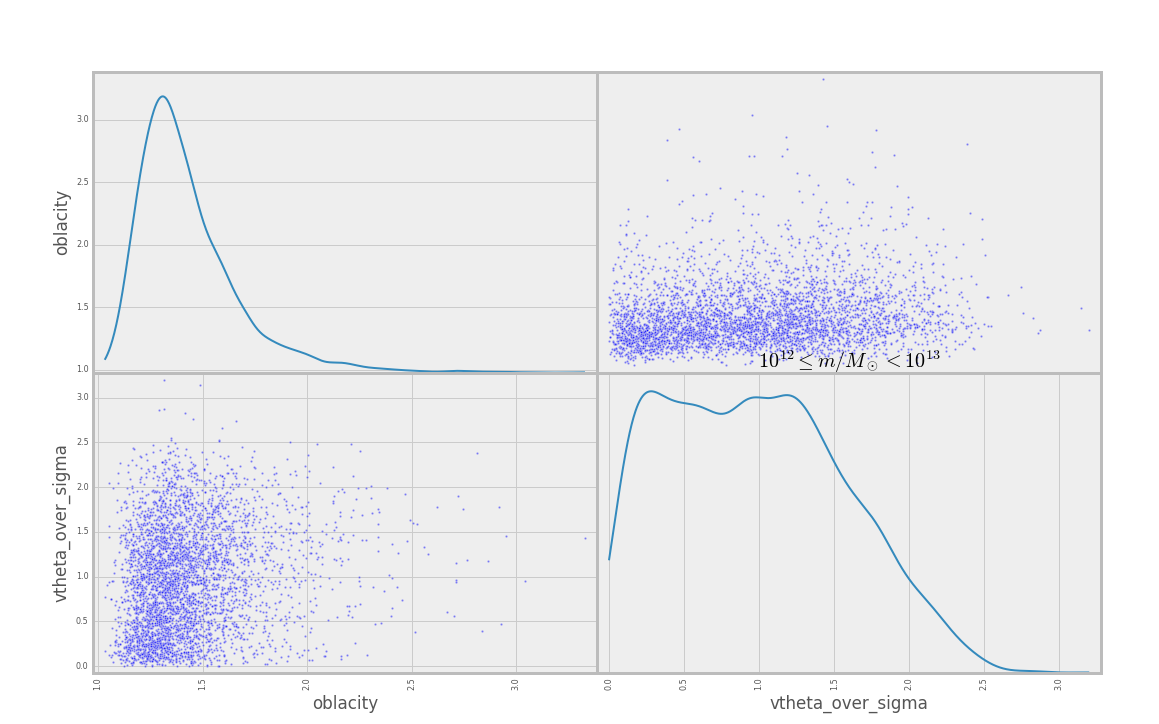

<IPython.core.display.Javascript object>


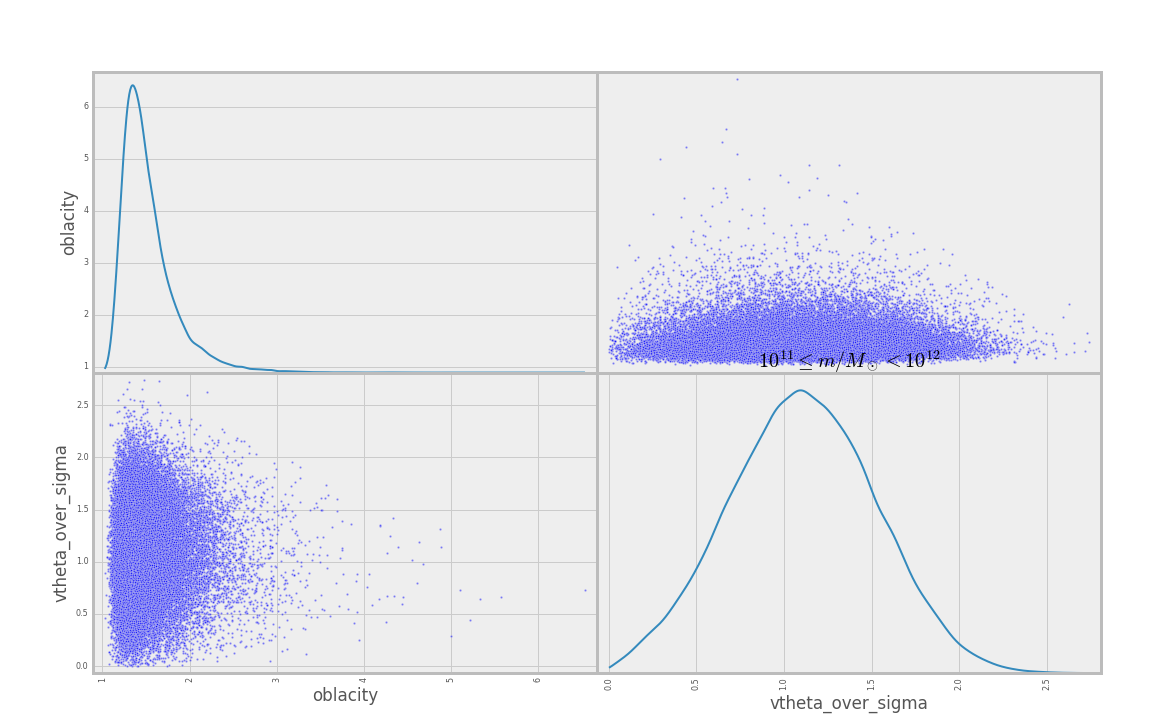

<IPython.core.display.Javascript object>


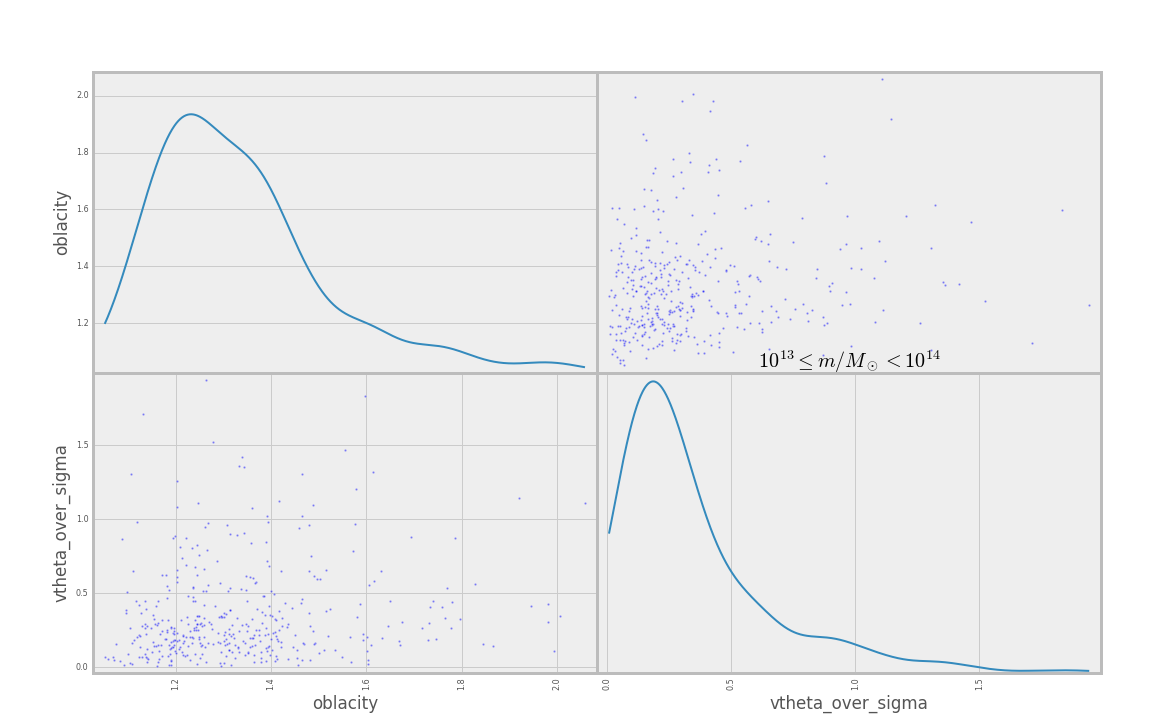

In [195]:
#f, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        plt.figure()
        _tmp = inertia_data[10+i+2*j <= inertia_data['log(mass)']][inertia_data['log(mass)'] < 11+i+2*j][inertia_data['sigma_over_vtheta'] > 0]
        _tmp['vtheta_over_sigma'] = 1./_tmp['sigma_over_vtheta']
        ax = plt.gca()
        
        scatter_matrix(_tmp[['oblateness', 'vtheta_over_sigma']], ax=ax, diagonal='kde', )#hist_kwds={'bins': 64})
        plt.title(r'$10^{%s} \leq m/M_\odot < 10^{%s}$' % (10+i+2*j, 11+i+2*j))
        plt.savefig('/home/cadiou/plots/oblateness_sigma_o_theta__%s_logm_%s.png' % (10+i+2*j, 11+i+2*j))
        
        
#plt.savefig('/home/cadiou/plots/oblate__vtheta_o_sigma__hist2d.png')

<IPython.core.display.Javascript object>


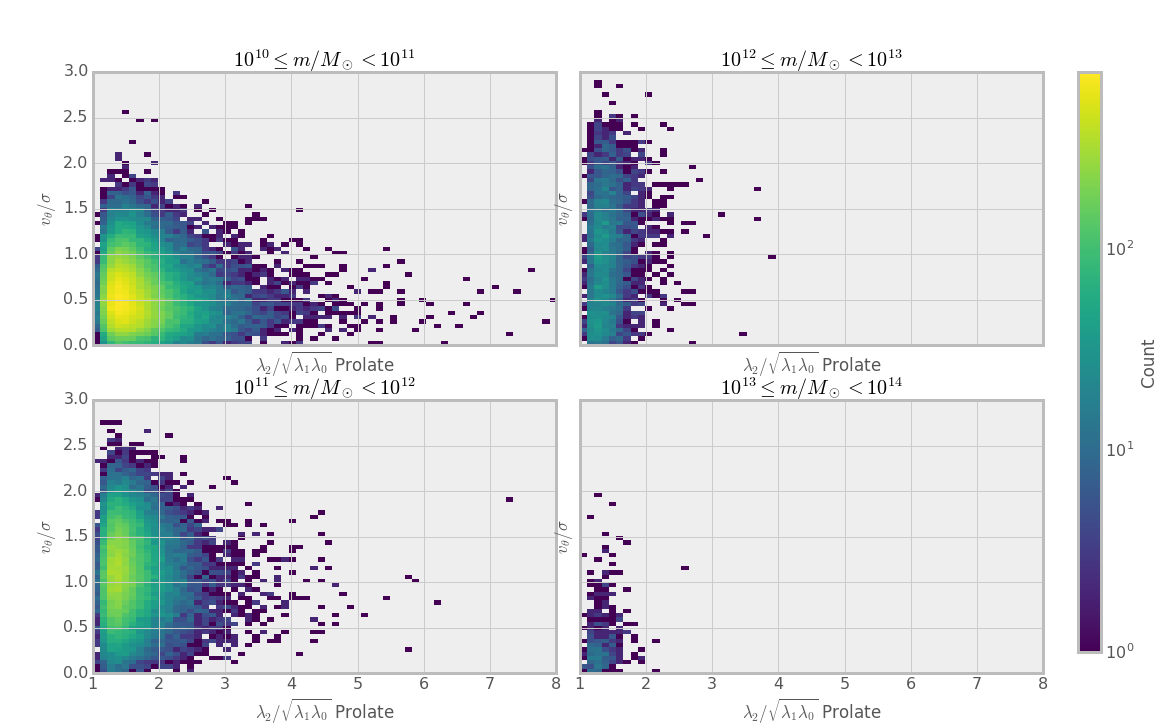

                        log(prolacity)  log(sigma_over_vtheta)
log(prolacity)                1.000000                0.094296
log(sigma_over_vtheta)        0.094296                1.000000
                        log(prolacity)  log(sigma_over_vtheta)
log(prolacity)                1.000000               -0.160634
log(sigma_over_vtheta)       -0.160634                1.000000
                        log(prolacity)  log(sigma_over_vtheta)
log(prolacity)                1.000000                0.025679
log(sigma_over_vtheta)        0.025679                1.000000
                        log(prolacity)  log(sigma_over_vtheta)
log(prolacity)                1.000000               -0.189823
log(sigma_over_vtheta)       -0.189823                1.000000


In [182]:
f, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
n = LogNorm()

bounds = [[1, 8], [0, 3]]

for i in range(2):
    for j in range(2):
        _tmp = inertia_data[10+i+2*j <= inertia_data['log(mass)']][inertia_data['log(mass)'] < 11+i+2*j][inertia_data['sigma_over_vtheta'] > 0]
        ax = axes[i,j]
        _,_,_,img = ax.hist2d(_tmp['prolateness'], 1./_tmp['sigma_over_vtheta'], bins=64, norm=n, cmap='viridis', range=bounds, cmin=1)
        #img.set_interpolation('bessel')
        ax.set_xlabel(r'$\lambda_2 / \sqrt{\lambda_1 \lambda_0}$ Prolate')
        ax.set_ylabel(r'$v_\theta / \sigma$')
        ax.set_title(r'$10^{%s} \leq m/M_\odot < 10^{%s}$' % (10+i+2*j, 11+i+2*j))
        
        print(_tmp[['log(prolateness)', 'log(sigma_over_vtheta)']].corr())
        
ax.set_xlim(bounds[0])
ax.set_ylim(bounds[1])
plt.subplots_adjust(wspace=0.05,right=0.90)
cbar_ax = f.add_axes([0.93, 0.1, 0.02, 0.8])
cb = plt.colorbar(img, cax=cbar_ax)
cb.set_label(r'Count')

plt.savefig('/home/cadiou/plots/prolate__vtheta_o_sigma__hist2d.png')